# Projet 07 : Effectuer une prédiction de revenus

---

## <font color=blue>Sommaire</font>

[1. Exploration des données utilisées](#1_0)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1. Première approche des données](#1_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2. Population des pays](#1_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.3. Distribution des revenus par centiles](#1_3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.4. Indice de Gini estimé par la Banque Mondiale](#1_4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.5. Création du dataframe income](#1_5)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.6. Analyse sur les indices de Gini](#1_6)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.7. Résumé de l'exploration des données](#1_7)  
  
[2. Concentration des revenus](#2_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Choix des pays par une classification](#2_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Comparaison de la distribution des revenus](#2_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Courbes de Lorenz des pays sélectionnés](#2_3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Evolution de l'indice de Gini dans le temps](#2_4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.5. Analyse de l'indice de Gini](#2_5)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.6. Pour aller plus loin](#2_6)  
  
[3. Echantillonnage des individus (notebook séparé)](data_analyst_projet07_M3_echantillonnage.ipynb)  

[4. Modélisation du revenu des individus (notebook séparé)](data_analyst_projet07_M4_preparation_donnees.ipynb)

---
**Importation des librairies**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

from itertools import compress
#import joblib

import sf_graphiques as sfg
#import sf_stats_inferentielles as sfsi
import sf_classification_acp as sfca

#import sf_modeles_regression as sfmr
#import sf_modeles_classif_supervisee as sfmcs

<a id='1_0'></a>

---
## <font color=blue>Mission 1 : Exploration des données utilisées</font>

### 1.1. Première approche des données

In [4]:
population = pd.read_csv("FAOSTAT_population_201908.csv")
population.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 persons,7752.118,X,International reliable sources,"UNDESA, Population Division – World Population..."
1,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 persons,7839.510,X,International reliable sources,"UNDESA, Population Division – World Population..."
2,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1952,1952,1000 persons,7934.980,X,International reliable sources,"UNDESA, Population Division – World Population..."
3,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1953,1953,1000 persons,8038.596,X,International reliable sources,"UNDESA, Population Division – World Population..."
4,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1954,1954,1000 persons,8150.447,X,International reliable sources,"UNDESA, Population Division – World Population..."


In [5]:
centiles = pd.read_csv("data-projet7.csv", decimal=",")
centiles.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [6]:
gini = pd.read_csv("GINI_v2_103695.csv", encoding='cp1252')
gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je vais retravailler ces dataframes pour pouvoir exploiter plus facilement les informations qu'ils contiennent.  
Je dois également uniformiser les références des pays, en m'assurant d'avoir les mêmes codes pays dans les différents DataFrame.

<a id='1_2'></a>

### 1.2. Population des pays

Les données sur la population des pays sont issues des séries annuelles sur la population du site de la FAO.  
Je retravaille le DataFrame pour ne conserver que les colonnes utiles et pour exprimer la population en unité d'habitants plutôt qu'en milliers d'habitants.

In [7]:
population.columns = ["x1","x2","fao_code","country","x4","x5","x6","x7","x8","year","x9","population","x10","x11","x12"]
population = population[["fao_code","country","year","population"]]
population["population"] = population.population * 1000
population.head()

,fao_code,country,year,population
0,2,Afghanistan,1950,7752118.0
1,2,Afghanistan,1951,7839510.0
2,2,Afghanistan,1952,7934980.0
3,2,Afghanistan,1953,8038596.0
4,2,Afghanistan,1954,8150447.0


Afin de pouvoir utiliser ces données avec les autres dataframes de données, je cherche à ajouter une colonne country_code. Pour ce faire, je télécharge les codes des pays et des groupes de pays sur le site de la FAO. Je conserve le code ISO3 qui est celui utilisé dans les autres fichiers à ma disposition.

In [8]:
country_codes = pd.read_excel('FAOSTAT_countrycode_201908.xls')
country_codes.head()

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN


In [9]:
country_codes.columns = ["fao_code","country","x1","x2","country_code","x3","x4"]
country_codes.drop(columns=["x1","x2","x3","x4"], inplace=True)
country_codes.head()

,fao_code,country,country_code
0,2,Afghanistan,AFG
1,5100,Africa,X06
2,284,Åland Islands,ALA
3,3,Albania,ALB
4,4,Algeria,DZA


In [10]:
country_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 3 columns):
fao_code        321 non-null int64
country         321 non-null object
country_code    258 non-null object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


Il y a 63 lignes pour lesquelles je ne dispose pas de code pays ISO3. Je vérifie les pays concernés.

In [11]:
country_codes[country_codes.country_code.isna()].fao_code.values

array([5848, 5600, 5300, 5501,   15, 5206, 5204, 5301, 5306,  357,   51,
       5854, 5101, 5302, 5307, 5401,   62, 5400, 5706,   78,   77, 9010,
        275, 5802, 5205, 5801, 5858, 5815, 5859, 5502, 5503, 5102, 5817,
       5849,  429, 5103, 5203, 5208, 5402, 5500, 5807, 5873, 5504,  286,
       5803, 5207, 5855, 5304, 5104, 5303, 5403,  420, 5810,  206, 9011,
        228, 5105, 5305, 5308, 5404,  246,  247,  248], dtype=int64)

Les codes FAO supérieurs à 5000 correspondent à des régions regroupant plusieurs pays. Je vérifie les pays dont le code FAO est inférieur à 5000.

In [12]:
country_codes[country_codes.country_code.isna() & (country_codes.fao_code < 5000)].country.values

array(['Belgium-Luxembourg', 'China (exc. Hong Kong & Macao)',
       'Czechoslovakia', 'Ethiopia PDR', 'Germany Fr', 'Germany Nl',
       'Kosovo', 'North Africa (exc Sudan)', 'Serbia (exc Kosovo)',
       'Sub-Saharan Africa', 'Sudan (former)', 'USSR', 'Yemen Ar Rp',
       'Yemen Dem', 'Yugoslav SFR'], dtype=object)

Les pays sans code pays ISO3 sont principalement des anciens pays démantelés en plusieurs. Je conserve juste le Kosovo, pays dont la situation internationale est un peu spéciale et floue, étant reconnu par une partie de la communauté internationale mais pas par l'Union Européenne ni par l'ONU. J'ajoute son code ISO3 XKX. Puis je supprime les pays ou groupes de pays sans code ISO3.

In [13]:
country_codes.loc[country_codes[country_codes.country == "Kosovo"].index, "country_code"] = "XKX"
country_codes.dropna(inplace=True)
#country_codes.to_csv("save_countrycode_201909.csv")

# dataframe de country_codes pour des merge plus faciles
country_codes_iso = country_codes[["country_code","country"]].copy()

Je remplace le code FAO par le country_code dans le dataframe population, puis je crée un multi-index basé sur le country_code et l'année.

In [14]:
population = population.merge(country_codes[["fao_code","country_code"]], how="left", on="fao_code")
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14867 entries, 0 to 14866
Data columns (total 5 columns):
fao_code        14867 non-null int64
country         14867 non-null object
year            14867 non-null int64
population      14867 non-null float64
country_code    14585 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 696.9+ KB


In [15]:
population[population.country_code.isna()].country.unique()

array(['Belgium-Luxembourg', 'Czechoslovakia', 'Ethiopia PDR',
       'Sudan (former)', 'USSR', 'Yugoslav SFR'], dtype=object)

Le code pays n'existe pas pour quelques pays qui ne sont pas génants pour mon étude. Les deux pays de l'entité Belgium-Luxembourg sont également renseignés individuellement, et ce sont les données individuelles qui nous intéresse. Les autres pays dont d'anciens blocs divisés en plusieurs pays. Encore une fois, ce sont les données pays par pays qui nous intéressent.  
Je supprime les lignes pour lesquelles le country_code est na.

In [16]:
population.dropna(inplace=True)
population.index = [population.country_code, population.year]
population.index.name = ["country_code","year"]
population.drop(columns=["fao_code","country_code","year"], inplace=True)
population.head()

country  population
country_code year                         
AFG          1950  Afghanistan   7752118.0
             1951  Afghanistan   7839510.0
             1952  Afghanistan   7934980.0
             1953  Afghanistan   8038596.0
             1954  Afghanistan   8150447.0

In [17]:
population.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14585 entries, (AFG, 1950) to (ZWE, 2018)
Data columns (total 2 columns):
country       14585 non-null object
population    14585 non-null float64
dtypes: float64(1), object(1)
memory usage: 273.1+ KB


**Vérification des données sur la Chine (éventuel doublon)**

Je vérifie dans les différents dataframes l'existence éventuelle de doublons sur les données de la Chine, afin d'analyser si je conserve les données détaillées ou groupées pour la Chine.

In [18]:
list_china = country_codes[country_codes.country.str.contains("China")].country_code
country_codes[country_codes.country.str.contains("China")]

,fao_code,country,country_code
58,351,China,CPR
60,96,"China, Hong Kong SAR",HKG
61,128,"China, Macao SAR",MAC
62,41,"China, mainland",CHN
63,214,"China, Taiwan Province of",TWN


In [19]:
population[population.index.get_level_values(0).isin(list_china)].country.unique()

array(['China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of'], dtype=object)

In [20]:
centiles[centiles.country.isin(list_china)].country.unique()

array(['CHN', 'TWN'], dtype=object)

In [21]:
gini[gini["Country Code"].isin(list_china)][["Country Name","Country Code"]]

,Country Name,Country Code
38,China,CHN
94,Hong Kong SAR China,HKG
144,Macao SAR China,MAC


Le dataframe population dispose de la population pour chacune des pays Chine, Hong Kong, Macao et Taiwan, ainsi que pour un regroupement de ces 4 pays dans une entité appelée Chine.  
Le dataframe centiles propose les informations pour les 2 pays Chine et Taiwan.  
Le dataframe gini  contient des données pour les 3 pays Chine, Hong Kong et Macao.  
**L'entité Chine dans son ensemble (CPR) peut être supprimée du dataframe population, car elle fait doublon avec les 4 pays détaillés. Dans les autres dataframes, nous n'avons pas de doublon.**

In [22]:
population.drop(index="CPR", inplace=True)
population.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14516 entries, (AFG, 1950) to (ZWE, 2018)
Data columns (total 2 columns):
country       14516 non-null object
population    14516 non-null float64
dtypes: float64(1), object(1)
memory usage: 271.9+ KB


C:\Anaconda3\envs\Jupyter\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [23]:
#population.to_csv("save_population_201909.csv")

<a id='1_3'></a>

### 1.3. Distribution des revenus par centiles

In [24]:
centiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
country         11599 non-null object
year_survey     11599 non-null int64
quantile        11599 non-null int64
nb_quantiles    11599 non-null int64
income          11599 non-null float64
gdpppp          11399 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [25]:
centiles.nb_quantiles.unique()

array([100], dtype=int64)

Le fichier "data-projet7.csv" contient les données des revenus moyens en PPP pour chaque centile de la population (nb_quantiles prend la valeur unique 100), ainsi que le PIB en PPP pour chaque pays.  
J'enlève la colonne nb_quantiles qui n'apporte plus aucune information, je renomme les colonnes et j'ajoute la colonne country avec le nom du pays pour exploiter plus facilement (et en cohérence avec les autres dataframes) ces données .  
  
Il y a deux pays (donc 200 lignes) où le PIB n'est pas renseigné. Je vérifie les pays concernés et j'analyse si je garde les données de ces pays.  
Je remarque que le nombre de lignes n'est pas un multiple de 100. Je vérifie le nombre de quantiles par pays pour détecter d'éventuelles données manquantes.

In [26]:
centiles.drop(columns="nb_quantiles", inplace=True)
centiles.columns = ["country_code","year","centile","income","gdp"]
centiles = centiles.merge(country_codes_iso, how='left', on="country_code")
print(centiles[centiles.gdp.isna()].country_code.unique())
print(centiles[centiles.gdp.isna()].country.unique())

['XKX' 'PSE']
['Kosovo' 'Palestine']


Les deux pays pour lesquels je n'ai pas de données sont le Kosovo et la Palestine. Ce sont deux territoires dont la situation géopolitique est instable. Cette instabilité politique fait que ces pays ne sont pas des cibles prioritaires dans la stratégie de la Banque qui m'emploie. Je peux supprimer les données pour ces deux pays.

In [27]:
centiles.dropna(inplace=True)
temp = centiles.groupby("country_code").centile.count()
temp[temp < 100]

country_code
LTU    99
Name: centile, dtype: int64

In [28]:
print("Pays correspondant à LTU : {}".format(country_codes[country_codes.country_code == "LTU"].country))
centiles[centiles.country_code == "LTU"].centile.unique()

Pays correspondant à LTU : 161    Lithuania
Name: country, dtype: object


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [29]:
centiles[(centiles.country_code == "LTU") & (centiles.centile == 40)]

,country_code,year,centile,income,gdp,country
6239,LTU,2008,40,4868.4507,17571.0,Lithuania


Il manque le centile 41 pour la Lituanie. Je trace le graphique des centiles pour ce pays afin de voir si je peux facilement estimer la valeur manquante.

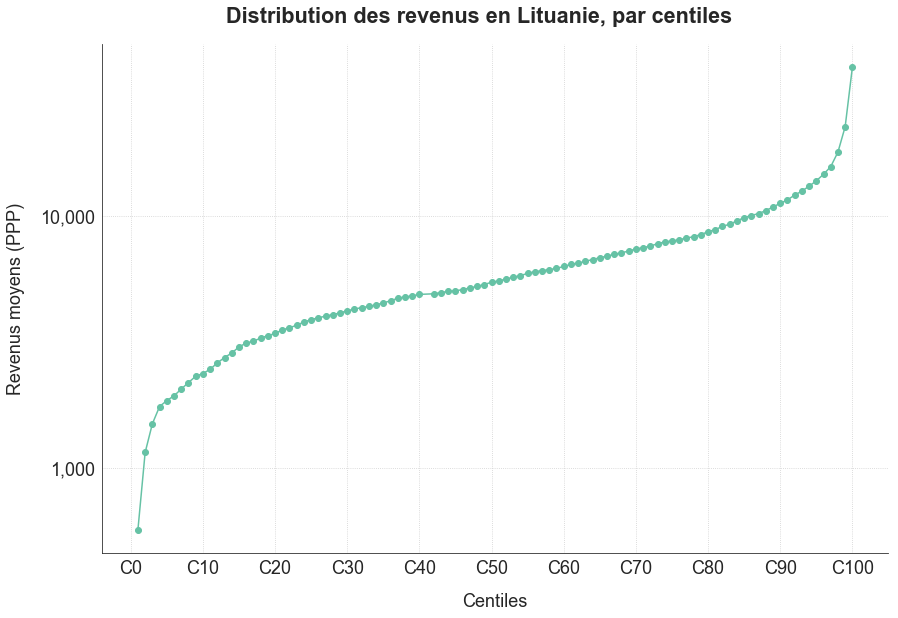

In [30]:
graph11 = sfg.MyGraph(title="Distribution des revenus en Lituanie, par centiles")
graph11.ax[0].set_yscale('log')
graph11.add_plot(x_values=centiles[centiles.country_code=="LTU"].centile, y_values=centiles[centiles.country_code=="LTU"].income, \
                    label="Centiles", marker="o",with_grid='both', grid_style=':')
graph11.set_axe('x', label="Centiles", tick_min=0, tick_max=100, tick_step=10, \
               tick_labels=["C{}".format(i) for i in np.arange(0,101,10)])
graph11.set_axe('y', label="Revenus moyens (PPP)", tick_labels_format=':,.0f')
fig, ax = graph11.fig, graph11.ax
plt.savefig("M1_distrib_centiles_lituanie.png")
plt.show()

Il y a très peu de variation entre les revenus moyens des centiles 40 et 42. Le revenu moyen du centile 41 peut donc être estimé linéairement en prenant la moyenne des revenus moyens des centiles 40 et 42.

In [31]:
revenu41 = centiles[(centiles.country_code == "LTU") & (centiles.centile == 40)].copy()
revenu41.centile = 41
revenu41.income = centiles[(centiles.country_code == "LTU") & (centiles.centile.isin([40,42]))].income.mean()
centiles = centiles.append(revenu41, ignore_index=True)
centiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 6 columns):
country_code    11400 non-null object
year            11400 non-null int64
centile         11400 non-null int64
income          11400 non-null float64
gdp             11400 non-null float64
country         11400 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 534.5+ KB


Je n'ai plus de données manquantes. Je vérifie les valeurs aberrantes, notamment que les variations des revenus moyens sont croissantes d'un centile à l'autre, et que tous les PIB sont égaux pour un pays.

In [32]:
temp = centiles.sort_values(by=["country_code","year","centile"]).copy()
temp["variation"] = [(temp.iloc[lin].income / temp.iloc[lin-1].income - 1) if temp.iloc[lin].centile > 1 else np.nan for lin in np.arange(len(centiles))]
temp.describe()

,year,centile,income,gdp,variation
count,11400.000000,11400.000000,11400.000000,1.140000e+04,11286.000000
mean,2007.973684,50.500000,6146.734875,5.021841e+04,0.053233
std,0.912532,28.867336,9476.131444,4.000513e+05,0.417631
min,2004.000000,1.000000,16.719418,3.031931e+02,0.000341
25%,2008.000000,25.750000,903.833633,2.576000e+03,0.015703
50%,2008.000000,50.500000,2459.174850,7.709000e+03,0.021839
75%,2008.000000,75.250000,7678.167500,1.877300e+04,0.034652
max,2011.000000,100.000000,176928.550000,4.300332e+06,38.212848


Toutes les variations sont positives. Toutefois, je note une variation maximum qui me paraît atypique par rapport aux autres valeurs. Je vérifie les valeurs des variations avec un graphique de dispersion afin de voir si les fortes variations se situent aux extrémités des distributions de revenus.

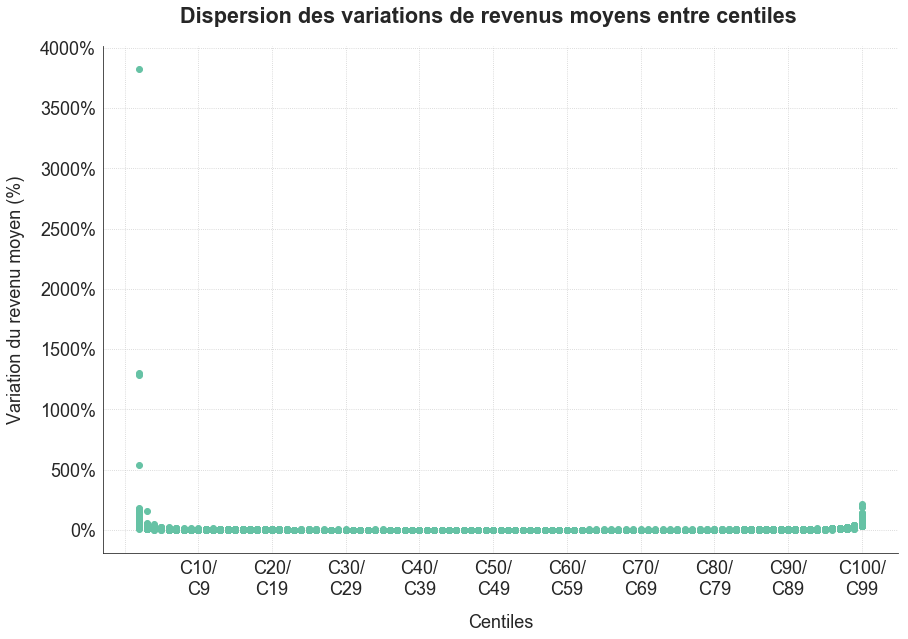

In [33]:
graph12 = sfg.MyGraph(title="Dispersion des variations de revenus moyens entre centiles")
graph12.add_plot(x_values=temp.centile, y_values=temp.variation, label="", marker="o", linestyle="" ,with_grid='both', grid_style=':')
graph12.set_axe('x', label="Centiles", tick_min=0, tick_max=100, tick_step=10, \
               tick_labels=["C{}/\nC{}".format(i,i-1) if i>0 else " " for i in np.arange(0,101,10)])
graph12.set_axe('y', label="Variation du revenu moyen (%)", tick_labels_format=':.0%')
fig, ax = graph12.fig, graph12.ax
plt.savefig("M1_dispersion_varaition_revenusmoyens.png")
plt.show()

Toutes les variations extrêmes concernent le deuxième centile par rapport au premier. Pour commencer, je vérifie la dispersion des variations entre le deuxième centile et le premier centile. Ensuite, je liste les pays concernés par les variations supérieures à 500%, qui paraissent être des valeurs vraiment atypiques.

In [34]:
temp[temp.centile==2].variation.describe()

count    114.000000
mean       1.218390
std        3.896141
min        0.117880
25%        0.322051
50%        0.536296
75%        0.888167
max       38.212848
Name: variation, dtype: float64

In [35]:
list_variation = temp[temp.variation >= 5].country_code
temp[(temp.country_code.isin(list_variation)) & temp.centile.isin([1,2,3])]

,country_code,year,centile,income,gdp,country,variation
1500,CAN,2008,1,122.424810,35895.0,Canada,NaN
1501,CAN,2008,2,1692.514200,35895.0,Canada,12.824928
1502,CAN,2008,3,2715.053700,35895.0,Canada,0.604154
1700,CHN,2007,1,16.719418,5712.0,"China, mainland",NaN
1701,CHN,2007,2,234.150730,5712.0,"China, mainland",13.004718
1702,CHN,2007,3,282.894900,5712.0,"China, mainland",0.208174
4900,ISR,2008,1,142.350430,25740.0,Israel,NaN
4901,ISR,2008,2,914.657960,25740.0,Israel,5.425397
4902,ISR,2008,3,1356.198600,25740.0,Israel,0.482739
5700,KOR,2008,1,17.317732,19162.0,Republic of Korea,NaN


Seuls 4 pays sont concernés par ces valeurs atypiques. La variation suivante (entre le deuxième et le troisième décile) ne paraît atypique pour aucun de ces pays. Tout juste est elle élevée pour la République de Corée, qui semble être un pays avec une forte variation des revenus dans les premiers centiles.  
Mes recherches sur internet ne me permettent pas de conclure avec certitude à une erreur sur ces données. Je les conserve.

Je regarde la dispersion des variables présentes dans le dataframe centiles.

In [36]:
centiles.describe(include='all')

,country_code,year,centile,income,gdp,country
count,11400,11400.000000,11400.000000,11400.000000,1.140000e+04,11400
unique,114,NaN,NaN,NaN,NaN,114
top,PAN,NaN,NaN,NaN,NaN,Romania
freq,100,NaN,NaN,NaN,NaN,100
mean,NaN,2007.973684,50.500000,6146.734875,5.021841e+04,NaN
std,NaN,0.912532,28.867336,9476.131444,4.000513e+05,NaN
min,NaN,2004.000000,1.000000,16.719418,3.031931e+02,NaN
25%,NaN,2008.000000,25.750000,903.833633,2.576000e+03,NaN
50%,NaN,2008.000000,50.500000,2459.174850,7.709000e+03,NaN
75%,NaN,2008.000000,75.250000,7678.167500,1.877300e+04,NaN


La valeur maximale de gdp me paraît élevée. Je graphe la dispersion pour cette variable.

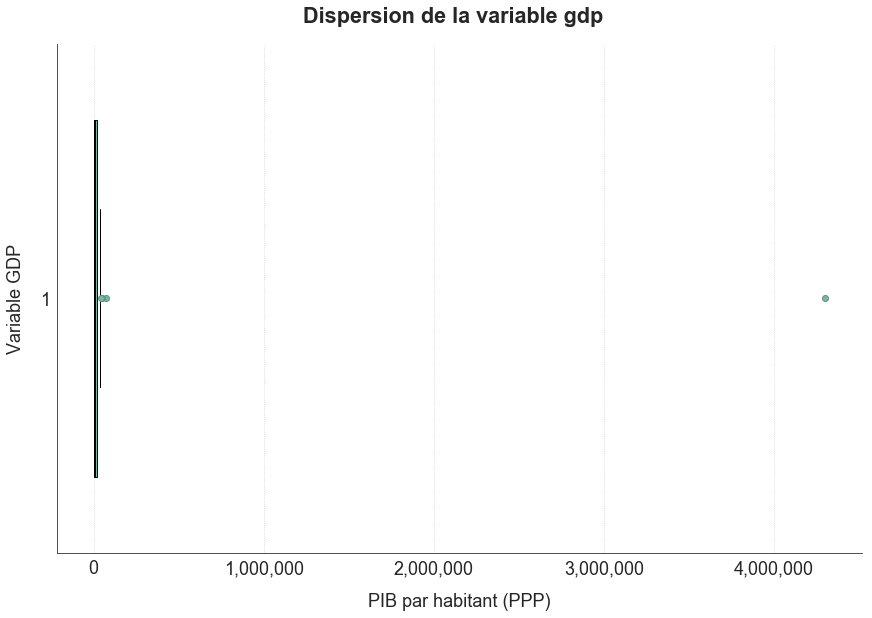

In [37]:
graph13 = sfg.MyGraph(title="Dispersion de la variable gdp")
graph13.add_boxplot(values=centiles.groupby("country_code").gdp.mean(), vertical=False)
graph13.set_axe('x', label="PIB par habitant (PPP)", tick_labels_format=':,.0f')
graph13.set_axe('y', label="Variable GDP")
fig, ax = graph13.fig, graph13.ax
plt.savefig("M1_dispersion_gdp_1.png")
plt.show()

De toute évidence, il y a une valeur atypique pour la variable gdp. Je regarde le pays concerné.

In [38]:
centiles[(centiles.gdp > 1000000) & (centiles.centile == 1)]

,country_code,year,centile,income,gdp,country
3200,FJI,2008,1,308.17334,4300332.0,Fiji


Je vérifie si je trouve une valeur cohérente en divisant par le nombre d'habitants.

In [39]:
recalcul = centiles[(centiles.gdp > 1000000) & (centiles.centile == 1)][["country_code","gdp","year"]].copy()
recalcul = recalcul.merge(population, how='left', on=["country_code","year"])
recalcul["gdp_par_habitant"] = recalcul.gdp / recalcul.population
recalcul.head()

,country_code,gdp,year,country,population,gdp_par_habitant
0,FJI,4300332.0,2008,Fiji,843340.0,5.099168


En consultant le site de la Banque Mondiale ([https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=FJ]), je trouve un PIB par habitant de 7078 PPP pour 2008. Je m'appuie sur ce chiffre pour modifier la valeur dans le dataframe. Puis je trace à nouveau le graphique pour vérifier la dispersion après ma correction.

In [40]:
centiles.loc[centiles[centiles.country_code=="FJI"].index,"gdp"] = 7078
centiles[centiles.country_code=="FJI"].gdp.mean()

7078.0

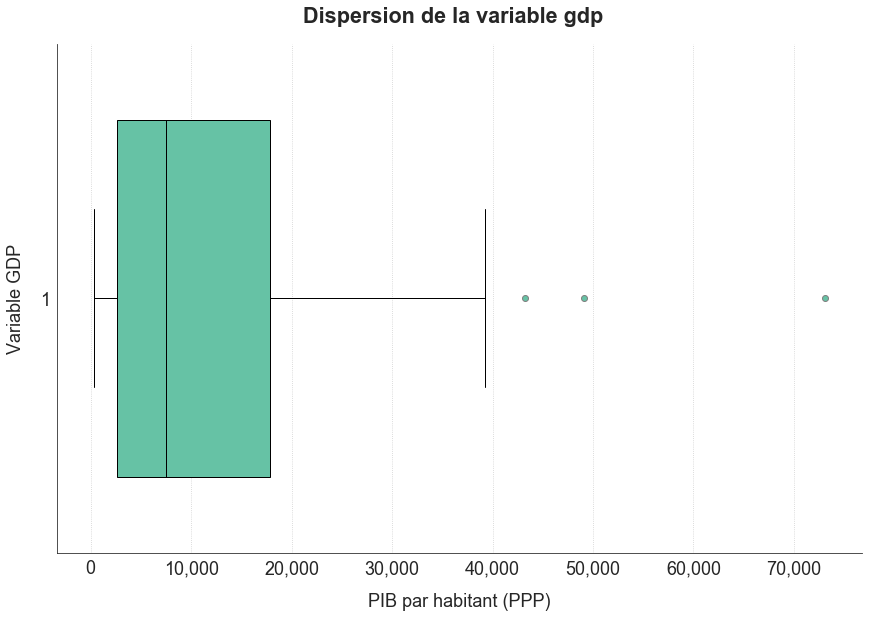

In [41]:
graph13b = sfg.MyGraph(title="Dispersion de la variable gdp")
graph13b.add_boxplot(values=centiles.groupby("country_code").gdp.mean(), vertical=False)
graph13b.set_axe('x', label="PIB par habitant (PPP)", tick_labels_format=':,.0f')
graph13b.set_axe('y', label="Variable GDP")
fig, ax = graph13b.fig, graph13b.ax
plt.savefig("M1_dispersion_gdp_2.png")
plt.show()

Les données paraissent désormais correctement nettoyées. Je les sauvegarde.

In [42]:
#centiles.to_csv("save_centiles_201909.csv")

J'obtiens le revenu moyen de chaque pays pour chaque année disponible en calculant la moyenne des données croisées par pays et par année sur la colonne 'income'.

In [43]:
average_income = pd.pivot_table(data=centiles, values="income", columns="year", index="country_code", aggfunc=np.mean)
average_income.head(10)

year,2004,2006,2007,2008,2009,2010,2011
country_code,,,,,,,
ALB,NaN,NaN,NaN,2994.829902,NaN,NaN,NaN
ARG,NaN,NaN,NaN,5847.884654,NaN,NaN,NaN
ARM,NaN,NaN,NaN,1628.382785,NaN,NaN,NaN
AUT,NaN,NaN,NaN,16637.600204,NaN,NaN,NaN
AZE,NaN,NaN,NaN,2357.429023,NaN,NaN,NaN
BEL,NaN,NaN,NaN,15024.614176,NaN,NaN,NaN
BFA,NaN,NaN,NaN,NaN,917.952658,NaN,NaN
BGD,NaN,NaN,NaN,NaN,NaN,998.692409,NaN
BGR,NaN,NaN,NaN,4984.978559,NaN,NaN,NaN


In [44]:
print("Nombre maximum de colonnes (années) renseignées par ligne (pays) : {}".format(max(average_income.count(axis=1))))
print("Nombre minimum de colonnes (années) renseignées par ligne (pays) : {}".format(min(average_income.count(axis=1))))

Nombre maximum de colonnes (années) renseignées par ligne (pays) : 1
Nombre minimum de colonnes (années) renseignées par ligne (pays) : 1


Une seule colonne est renseignée par ligne.  
Le fichier ne contient les données pour un pays que pour une seule année, qui peut différer selon les pays. Je vérifie la répartition des données entre les années disponibles en base.

In [45]:
print("Nombre de pays = {}".format(len(average_income)))
average_income.count()

Nombre de pays = 114


year
2004     1
2006     5
2007    15
2008    75
2009    11
2010     6
2011     1
dtype: int64

Je dispose des données pour 114 pays : 1 pays en 2004, 5 pays en 2006, 15 pays en 2007, 75 pays en 2008, 11 pays en 2009, 6 pays en 2010 et 1 pays en 2011.  
2008 est l'année pour laquelle nous avons le plus de données (75 pays).

**Création d'un dataframe contenant les revenus moyens par décile**

Je crée un dataframe contenant les revenus moyens par décile. Ce découpage par décile me sera utile pour d'éventuelles comparaison ainsi que pour générer des graphiques plus lisibles qu'avec des centiles.

In [46]:
deciles = pd.DataFrame(index=np.arange(10*centiles.country_code.nunique()), columns=["country_code","year","decile","income","country"])
cpt_deciles = -1
for pays in centiles.country_code.unique():
    annee_ref = centiles[(centiles.country_code==pays)].year.values[0]
    nom_pays = centiles[(centiles.country_code==pays)].country.values[0]
    for i in np.arange(10):
        cpt_deciles += 1
        deciles.loc[cpt_deciles,"country_code"] = pays
        deciles.loc[cpt_deciles,"year"] = annee_ref
        deciles.loc[cpt_deciles,"decile"] = i + 1
        deciles.loc[cpt_deciles,"income"] = centiles[(centiles.country_code==pays) & (centiles.centile>i*10) & \
                                           (centiles.centile<=(i+1)*10)].income.mean()
        deciles.loc[cpt_deciles,"country"] = pays
#deciles.to_csv("save_deciles_201909.csv")
deciles.head()

,country_code,year,decile,income,country
0,ALB,2008,1,1110.02,ALB
1,ALB,2008,2,1513.77,ALB
2,ALB,2008,3,1825.46,ALB
3,ALB,2008,4,2070.48,ALB
4,ALB,2008,5,2354.91,ALB


<a id='1_4'></a>

### 1.4. Indice de Gini estimé par la Banque Mondiale

In [47]:
gini["Indicator Name"].unique()

array(['GINI index (World Bank estimate)'], dtype=object)

In [48]:
gini["Indicator Code"].unique()

array(['SI.POV.GINI'], dtype=object)

Toutes les données concernent le même indicateur. Je peux supprimer les 2 colonnes relatives à l'indicateur.  
La dernière colonne est vide. Je peux également la supprimer.

In [49]:
gini = gini.iloc[:,:-1]
gini.drop(columns=["Indicator Name","Indicator Code"], inplace=True)
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
Country Name    264 non-null object
Country Code    264 non-null object
1960            0 non-null float64
1961            0 non-null float64
1962            0 non-null float64
1963            0 non-null float64
1964            0 non-null float64
1965            0 non-null float64
1966            0 non-null float64
1967            0 non-null float64
1968            0 non-null float64
1969            0 non-null float64
1970            0 non-null float64
1971            0 non-null float64
1972            0 non-null float64
1973            0 non-null float64
1974            0 non-null float64
1975            0 non-null float64
1976            0 non-null float64
1977            0 non-null float64
1978            0 non-null float64
1979            3 non-null float64
1980            2 non-null float64
1981            7 non-null float64
1982            1 non-null float64
1983            3 

Nous avons les données pour 50 pays ou plus (sur un total de 264) seulement pour les années comprises entre 2003 et 2015. Les données sur les centiles sont centrées autour de 2008 (de 2004 à 2011) sur des années où je dispose de l'information pour au moins 70 pays.  
Je vais donc ne conserver les données que sur les 13 années de 2003 à 2015.

In [50]:
list_columns = ["Country Name","Country Code"]
list_columns.extend(np.arange(2003,2016,1).astype('str'))
gini = gini[list_columns]
list_columns = ["country","country_code"]
list_columns.extend(np.arange(2003,2016,1))
gini.columns = list_columns
gini.head(10)

,country,country_code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,50.7,48.3,47.7,46.6,46.3,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN
8,Armenia,ARM,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je crée une copie du dataframe gini qui contient une ligne de données pour chaque paire pays/année où l'indice de Gini est fourni.

In [51]:
gini_year = gini.melt(id_vars=["country_code","country"], var_name="year", value_name="gini").dropna().\
    sort_values(["country_code","year"])
gini_year.index = [gini_year.country_code, gini_year.year]
gini_year.drop(columns=["country_code","year"], inplace=True)
#gini_year.to_csv("save_gini_201909.csv")
gini_year.head()

country  gini
country_code year                 
AGO          2008     Angola  42.7
ALB          2005    Albania  30.6
             2008    Albania  30.0
             2012    Albania  29.0
ARG          2003  Argentina  50.7

In [52]:
gini.set_index("country_code", inplace=True)
print("Nombre de pays sans donnée pour l'indice de Gini = {}".format(len(gini) - gini_year.index.get_level_values(0).nunique()))

Nombre de pays sans donnée pour l'indice de Gini = 106


Je regarde le nombre de données par année, d'une part sur toute la période 2003 à 2015, d'autre part sur la période 2004 à 2011.

In [53]:
gini_year.groupby("country_code")[["country","gini"]].count().groupby("gini").country.count()

gini
1     24
2     35
3     19
4      7
5      6
6      4
7      5
8      1
9      1
10     7
11     4
12    12
13    33
Name: country, dtype: int64

In [54]:
gini_year[gini_year.index.get_level_values(1).isin(np.arange(2004,2012))].groupby("country_code")[["country","gini"]].count().groupby("gini").country.count()

gini
1    53
2    18
3    19
4     3
5     3
6     6
7     6
8    45
Name: country, dtype: int64

La base de données ne contient pas les indices de Gini pour tous les pays : aucun indice de gini n'est fourni pour 106 pays. Ils sont calculés pour chacune des 8 années de 2004 à 2001 pour 45 pays seulement.  
Année par année, nous avons les indices de Gini pour plus de 70 pays. Mais les pays diffèrent donc en partie d'une année sur l'autre.  
Je croise les deux sources pour voir le nombre de pays qui ont des données pour la même année dans les 2 dataframes centiles et data_gini.

<a id='1_5'></a>

### 1.5. Création du dataframe income

In [55]:
income = pd.DataFrame(centiles[["country_code","year","income","gdp"]].groupby(["country_code","year"]).mean())
income.columns = ["revenu_moyen","pib_par_habitant"]
income = income.merge(gini_year[["gini"]], how='left', left_index=True, right_index=True)  # left_index et right_index pour merger sur les multi-index
income.head()

,,revenu_moyen,pib_par_habitant,gini
country_code,year,,,
ALB,2008,2994.829902,7297.0,30.0
ARG,2008,5847.884654,13220.0,44.5
ARM,2008,1628.382785,5611.0,29.2
AUT,2008,16637.600204,36193.0,30.4
AZE,2008,2357.429023,8101.0,NaN


In [56]:
income[income.gini.notna()].groupby(level=1).count()

,revenu_moyen,pib_par_habitant,gini
year,,,
2004,1,1,1
2006,4,4,4
2007,10,10,10
2008,62,62,62
2009,9,9,9
2010,4,4,4


Il y a 62 pays pour lesquels je dispose de données en 2008 à la fois pour les centiles et pour la courbe de Gini.  
Je dispose également des informations pour 10 pays en 2007, 9 pays en 2009, pour 4 pays en 2006 et en 2010, et enfin pour un pays en 2004.  
Je vais pouvoir vérifier les calculs des indices de Gini pour chacun de ces 90 pays.  
J'ajoute également la population.  
Je calcule enfin le nombre d'années pour lesquels je dispose de l'estimation de l'indice de Gini par la Banque Mondiale lorsqu'il est disponible pour l'année de référence.

In [57]:
listgini = []
for i, row in income.iterrows():
    interlorenz, intergini = sfg.calcul_lorenz_gini(centiles[centiles.country_code == i[0]].income.values)
    listgini.append(intergini * 100)
income["gini_from_centiles"] = listgini
income = income.merge(population[["population"]], how='left', left_index=True, right_index=True)
income = income.reset_index().merge(gini_year[["gini"]].groupby(level=0).count().rename(columns={"gini": "nb_annees_gini"}), \
                      how='left', on="country_code").set_index(["country_code","year"])
income = income.reset_index().merge(country_codes_iso, how='left', on="country_code").set_index(["country_code","year"])
#income.to_csv("save_income_201909.csv")
income.head(10)

,,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
country_code,year,,,,,,,
ALB,2008,2994.829902,7297.0000,30.0,32.141019,2991651.0,3.0,Albania
ARG,2008,5847.884654,13220.0000,44.5,46.524916,40382389.0,12.0,Argentina
ARM,2008,1628.382785,5611.0000,29.2,28.030458,2908220.0,13.0,Armenia
AUT,2008,16637.600204,36193.0000,30.4,29.532585,8338453.0,13.0,Austria
AZE,2008,2357.429023,8101.0000,NaN,32.903087,8821908.0,3.0,Azerbaijan
BEL,2008,15024.614176,33561.0000,28.4,30.157968,10779173.0,13.0,Belgium
BFA,2009,917.952658,1085.5139,39.8,41.346878,15141099.0,3.0,Burkina Faso
BGD,2010,998.692409,1233.0000,32.1,33.311251,152149102.0,2.0,Bangladesh
BGR,2008,4984.978559,11993.0000,33.6,37.813739,7510331.0,9.0,Bulgaria


<a id='1_6'></a>

### 1.6. Analyse sur les indices de Gini

Le but de cette partie est d'étudier les écarts entre les indices de Gini estimés par la Banque Mondiale et ceux calculés à partir des quantiles (centiles et déciles).

In [58]:
ecarts_bruts = income[income.gini.notna()].gini_from_centiles - income[income.gini.notna()].gini
ecarts_pourcentage = (income[income.gini.notna()].gini_from_centiles / income[income.gini.notna()].gini - 1) * 100
ecarts_gini = pd.DataFrame({'ecarts_valeur_centiles':ecarts_bruts, 'ecarts_pourcentage_centiles':ecarts_pourcentage})
ecarts_gini.head()

,,ecarts_valeur_centiles,ecarts_pourcentage_centiles
country_code,year,,
ALB,2008,2.141019,7.136730
ARG,2008,2.024916,4.550372
ARM,2008,-1.169542,-4.005281
AUT,2008,-0.867415,-2.853338
BEL,2008,1.757968,6.190029


In [59]:
listginideciles = []
for i, row in income.iterrows():
    interlorenz, intergini = sfg.calcul_lorenz_gini(deciles[deciles.country_code == i[0]].income.values)
    listginideciles.append(intergini * 100)
ecarts_gini["ecarts_valeur_deciles"] = list(compress(listginideciles, income.gini.notna())) - income[income.gini.notna()].gini
ecarts_gini["ecarts_pourcentage_deciles"] = (list(compress(listginideciles, income.gini.notna())) / income[income.gini.notna()].gini - 1) * 100
ecarts_gini.head()

,,ecarts_valeur_centiles,ecarts_pourcentage_centiles,ecarts_valeur_deciles,ecarts_pourcentage_deciles
country_code,year,,,,
ALB,2008,2.141019,7.136730,15.183761,50.612535
ARG,2008,2.024916,4.550372,13.638691,30.648743
ARM,2008,-1.169542,-4.005281,12.403942,42.479255
AUT,2008,-0.867415,-2.853338,12.543547,41.261668
BEL,2008,1.757968,6.190029,15.023581,52.899934


In [60]:
ecarts_gini.describe()

,ecarts_valeur_centiles,ecarts_pourcentage_centiles,ecarts_valeur_deciles,ecarts_pourcentage_deciles
count,90.000000,90.000000,90.000000,90.000000
mean,1.816757,4.701845,14.075122,39.499040
std,2.271715,5.760532,1.967475,10.773582
min,-3.626535,-7.041815,7.810291,15.165614
25%,0.653993,2.039097,13.013757,32.371483
50%,1.622425,4.458535,14.139689,39.530551
75%,2.837337,7.105774,15.050155,46.615396
max,8.276928,21.012907,19.567827,67.254395


Les écarts entre les indices de Gini donnés par le fichier et calculés à partir des centiles de revenus varient entre -3.63 points et +8.28 points, soit entre -7% et +21%. Ils restent faibles. Nous pouvons donc utiliser les indices de Gini calculés à partir des centiles pour avoir plus de données à disposition.  
En basant le calcul de l'indice de Gini sur les déciles, l'écart avec les indices de Gini estimés par la Banque Mondiale grandit. Moins le découpage des quantiles est précis, plus l'indice de Gini est élevé. En soit, cela paraît logique car le découpage moins fin augmente la concentration des revenus aux deux extrémités et diminue le nombre de points intermédiaires où les revenus sont concentrés.  
Le calcul de l'indice de Gini obtenu à partir des centiles est une bonne approximation de l'indice de Gini estimé par la Banque Mondiale.

<a id='1_7'></a>

### 1.7. Résumé de l'exploration des données

In [61]:
income.head()

,,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
country_code,year,,,,,,,
ALB,2008,2994.829902,7297.0,30.0,32.141019,2991651.0,3.0,Albania
ARG,2008,5847.884654,13220.0,44.5,46.524916,40382389.0,12.0,Argentina
ARM,2008,1628.382785,5611.0,29.2,28.030458,2908220.0,13.0,Armenia
AUT,2008,16637.600204,36193.0,30.4,29.532585,8338453.0,13.0,Austria
AZE,2008,2357.429023,8101.0,NaN,32.903087,8821908.0,3.0,Azerbaijan


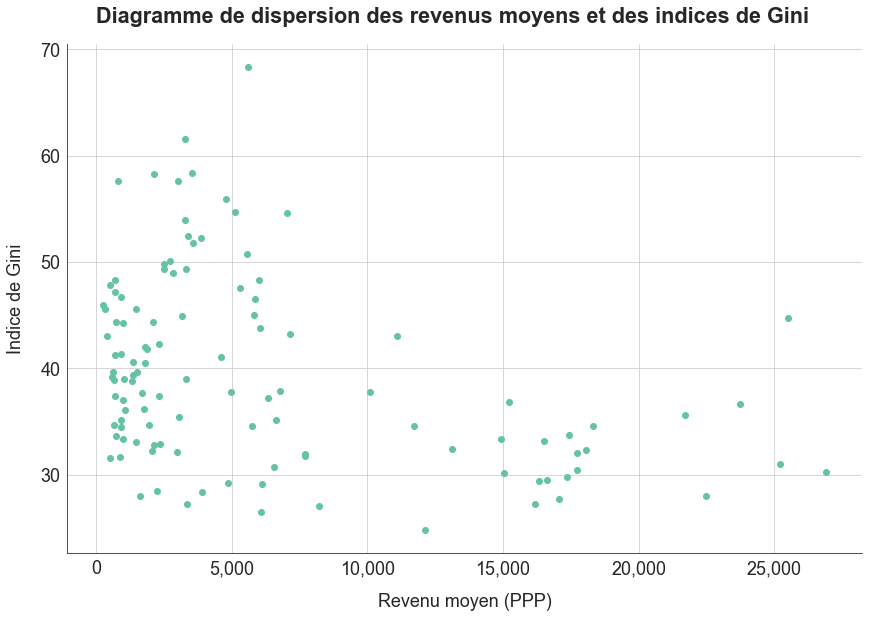

In [62]:
graph14 = sfg.MyGraph(title="Diagramme de dispersion des revenus moyens et des indices de Gini")
graph14.add_plot(x_values=income.revenu_moyen, y_values=income.gini_from_centiles, label="", marker='o', linestyle='', with_grid='both')
graph14.set_axe('x', label="Revenu moyen (PPP)", tick_labels_format=':,.0f')
graph14.set_axe('y', label="Indice de Gini")
fig, ax = graph14.fig, graph14.ax
plt.savefig("M1_dispersion_revenusmoyens_gini.png")
plt.show()

Les pays avec les plus grandes concentrations de revenus, c'est-à-dire les plus grandes hétérogénéités dans la distribution des revenus, se retrouvent essentiellement dans les pays avec les plus faibles revenus moyens. Seuls deux pays avec des revenus moyens supérieurs à 10 000 PPP ont un indice de Gini supérieur à 40.

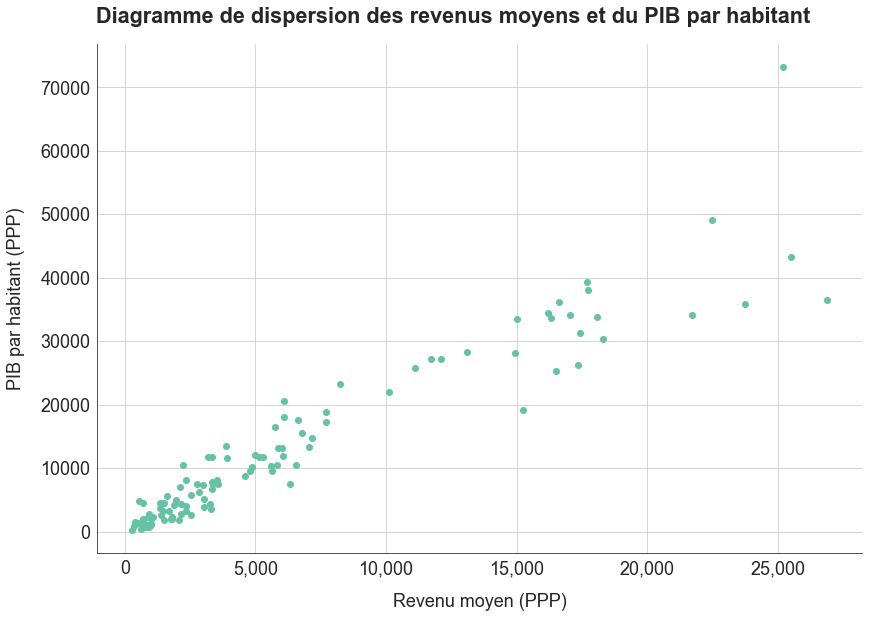

In [63]:
graph14b = sfg.MyGraph(title="Diagramme de dispersion des revenus moyens et du PIB par habitant")
graph14b.add_plot(x_values=income.revenu_moyen, y_values=income.pib_par_habitant, label="", marker='o', linestyle='', with_grid='both')
graph14b.set_axe('x', label="Revenu moyen (PPP)", tick_labels_format=':,.0f')
graph14b.set_axe('y', label="PIB par habitant (PPP)")
fig, ax = graph14b.fig, graph14b.ax
plt.savefig("M1_dispersion_revenusmoyens_pib.png")
plt.show()

Le graphique montre une relation linéaire claire (et logique) entre le revenu moyen et le PIB par habitant. La variable du revenu moyen suffit à notre étude.

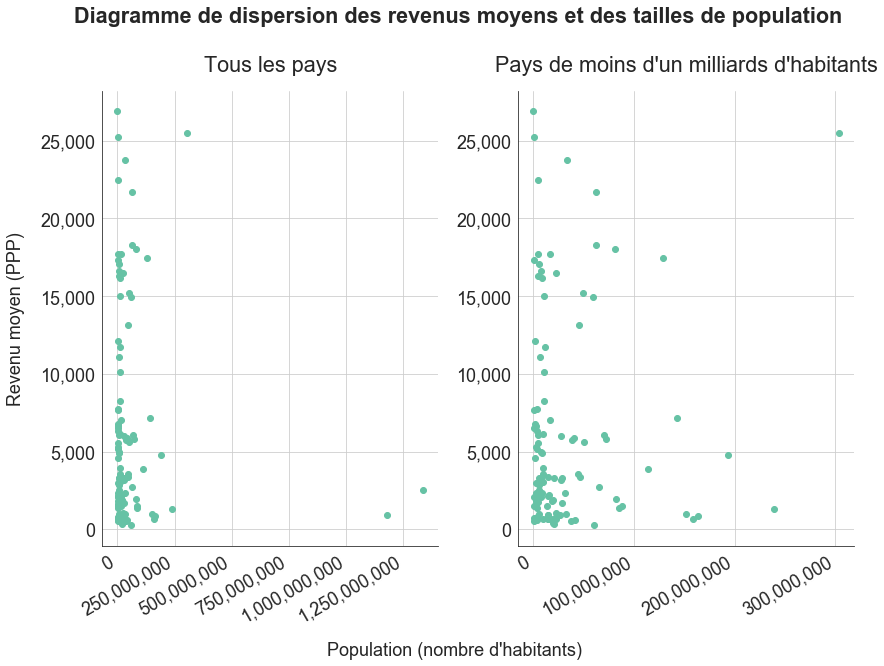

In [64]:
graph15 = sfg.MyGraph(title="Diagramme de dispersion des revenus moyens et des tailles de population", nblin=1, nbcol=2)
graph15.add_plot(x_values=income.population, y_values=income.revenu_moyen, label="", marker='o', linestyle='', with_grid='both', subtitle="Tous les pays", multi_index=1)
graph15.add_plot(x_values=income[income.population<1000000000].population, y_values=income[income.population<1000000000].revenu_moyen, label="", marker='o', linestyle='', with_grid='both', subtitle="Pays de moins d'un milliards d'habitants", multi_index=2)
graph15.set_axe('x', label="Population (nombre d'habitants)", label_position=(1.05,0.5), tick_labels_format=':,.0f', rotation=30, ha='right', multi_index=1)
graph15.set_axe('x', tick_labels_format=':,.0f', rotation=30, ha='right', multi_index=2)
graph15.set_axe('y', label="Revenu moyen (PPP)", tick_labels_format=':,.0f', multi_index=1)
graph15.set_axe('y', tick_labels_format=':,.0f', multi_index=2)
fig, ax = graph15.fig, graph15.ax
plt.savefig("M1_dispersion_revenusmoyens_population.png")
plt.show()

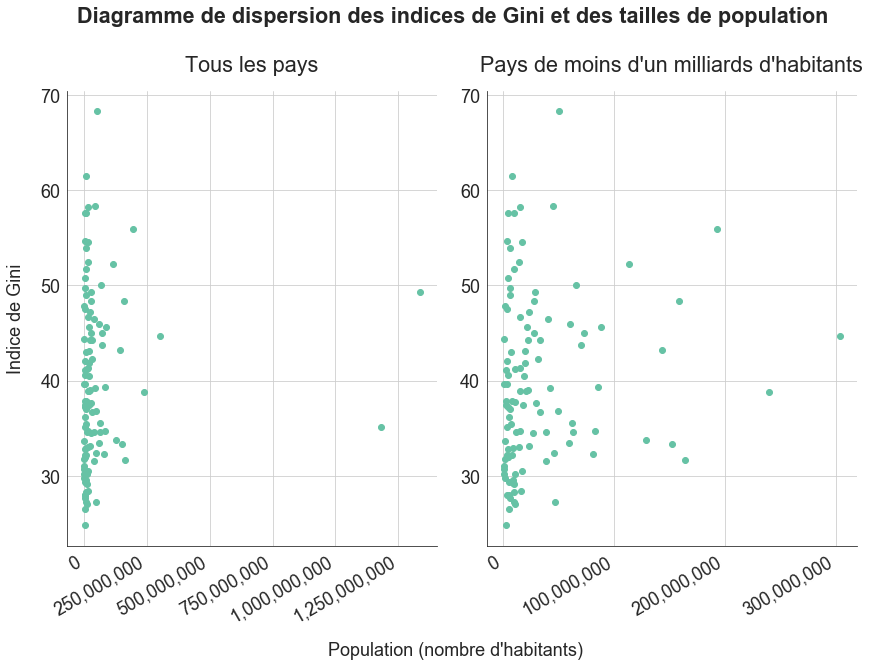

In [65]:
graph16 = sfg.MyGraph(title="Diagramme de dispersion des indices de Gini et des tailles de population", nblin=1, nbcol=2)
graph16.add_plot(x_values=income.population, y_values=income.gini_from_centiles, label="", marker='o', linestyle='', with_grid='both', subtitle="Tous les pays", multi_index=1)
graph16.add_plot(x_values=income[income.population<1000000000].population, y_values=income[income.population<1000000000].gini_from_centiles, label="", marker='o', linestyle='', with_grid='both', subtitle="Pays de moins d'un milliards d'habitants", multi_index=2)
graph16.set_axe('x', label="Population (nombre d'habitants)", label_position=(1.05,0.5), tick_labels_format=':,.0f', rotation=30, ha='right', multi_index=1)
graph16.set_axe('x', tick_labels_format=':,.0f', rotation=30, ha='right', multi_index=2)
graph16.set_axe('y', label="Indice de Gini", multi_index=1)
fig, ax = graph16.fig, graph16.ax
plt.savefig("M1_dispersion_gini_population.png")
plt.show()

Il ne semble pas y avoir de relation entre la taille de la population et l'indice de Gini, ni avec le revenu moyen.

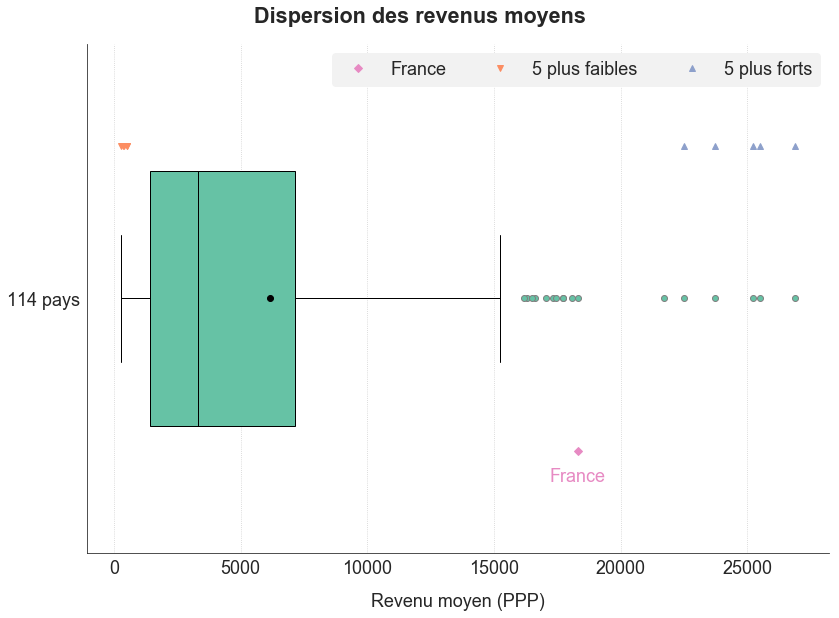

In [66]:
graph17 = sfg.MyGraph(title="Dispersion des revenus moyens")
graph17.add_plot(x_values=income.loc["FRA"].revenu_moyen, y_values=0.7, label="France", linestyle="", marker="D", color=graph17.liste_couleurs[3])
graph17.add_plot(x_values=income.sort_values(by="revenu_moyen").head().revenu_moyen, y_values=[1.3,1.3,1.3,1.3,1.3], label="5 plus faibles", linestyle="", marker="v", markerfacecolor=graph17.liste_couleurs[1], markeredgecolor=graph17.liste_couleurs[1])
graph17.add_plot(x_values=income.sort_values(by="revenu_moyen").tail().revenu_moyen, y_values=[1.3,1.3,1.3,1.3,1.3], label="5 plus forts", linestyle="", marker="^", markerfacecolor=graph17.liste_couleurs[2], markeredgecolor=graph17.liste_couleurs[2], legend=True)
graph17.add_boxplot(values=income.revenu_moyen, cat_labels=["114 pays"], means=True, vertical=False, width=0.5)
graph17.add_texts_boxplot(["France"], [income.loc["FRA"].revenu_moyen], [0.65], color=graph17.liste_couleurs[3])
graph17.set_axe('x', label="Revenu moyen (PPP)")
graph17.set_legend(ncol=3)
fig, ax = graph17.fig, graph17.ax
plt.savefig("M1_dispersion_revenusmoyens.png")
plt.show()

Pour calculer la population mondiale couverte par les données disponibles, je me base sur la population mondiale de 2008, qui est l'année pour laquelle j'ai le plus de données.

In [67]:
population_mondiale = population[population.index.get_level_values(1)==2008].population.sum()
data_summary = income[["revenu_moyen"]].groupby(level=1).count().rename(columns={"revenu_moyen": "nb_pays_dispo"})
data_summary = data_summary.merge(income[["population"]].groupby(level=1).sum(), how='left', left_index=True, right_index=True)
data_summary["population_couverte"] = data_summary.population / population_mondiale
data_summary = data_summary.merge(income[income.gini.notna()][["revenu_moyen"]].groupby(level=1).count().rename(columns={"revenu_moyen": "gini_nb_pays_dispo"}), how='left', left_index=True, right_index=True)
data_summary = data_summary.merge(income[income.gini.notna()][["population"]].groupby(level=1).sum().rename(columns={"population": "gini_population"}), how='left', left_index=True, right_index=True)
data_summary["gini_population_couverte"] = data_summary.gini_population / population_mondiale
data_summary.loc["total"] = data_summary.loc[:].sum()
data_summary.style.format({"population":'{:,.0f}', "population_couverte":'{:.2%}', "gini_population":'{:,.0f}', "gini_population_couverte":'{:.2%}'})

,nb_pays_dispo,population,population_couverte,gini_nb_pays_dispo,gini_population,gini_population_couverte
year,,,,,,
2004,1,"17,806,638",0.26%,1,"17,806,638",0.26%
2006,5,"288,080,793",4.27%,4,"265,967,368",3.94%
2007,15,"2,708,268,813",40.14%,10,"102,664,489",1.52%
2008,75,"2,327,694,797",34.50%,62,"1,583,436,462",23.47%
2009,11,"432,052,779",6.40%,9,"321,982,374",4.77%
2010,6,"389,144,320",5.77%,4,"215,490,974",3.19%
2011,1,"14,948,919",0.22%,nan,nan,nan%
total,114,"6,177,997,059",91.56%,90,"2,507,348,305",37.16%


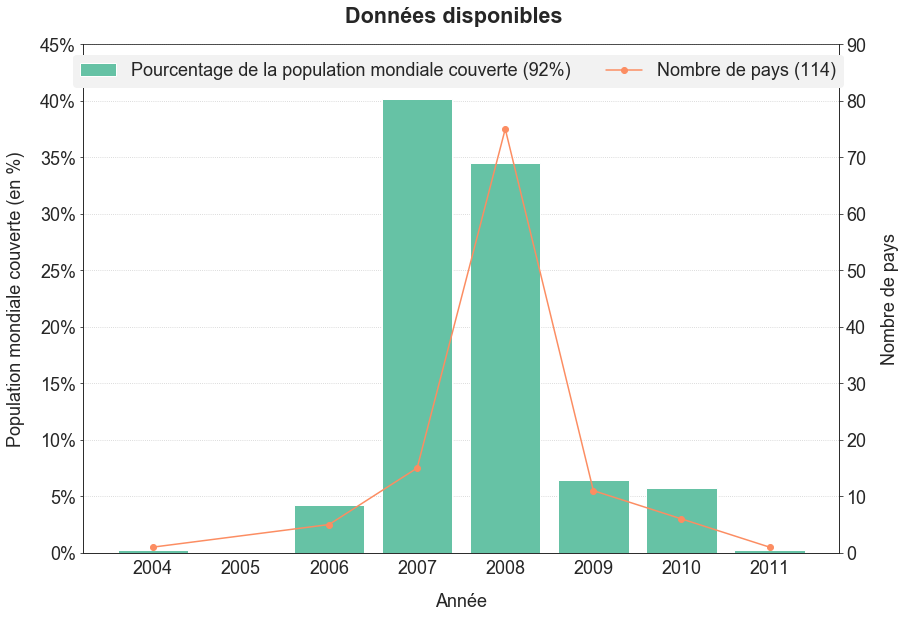

In [68]:
graph18 = sfg.MyGraph(title="Données disponibles")
graph18.add_barv(x_values=data_summary.iloc[:-1].index, y_height=data_summary.iloc[:-1].population_couverte, label="Pourcentage de la population mondiale couverte ({:.0%})".format(data_summary.iloc[-1].population_couverte))
graph18.add_plot(x_values=data_summary.iloc[:-1].index, y_values=data_summary.iloc[:-1].nb_pays_dispo, label="Nombre de pays ({:.0f})".format(data_summary.iloc[-1].nb_pays_dispo), marker='o', color=graph18.liste_couleurs[1], twinx=True)
graph18.set_axe('x', label="Année")
graph18.set_axe('y', label="Population mondiale couverte (en %)", tick_min=0, tick_max=0.45, tick_labels_format=':.0%')
graph18.set_axe('y', label="Nombre de pays", tick_min=0, tick_max=90, multi_index=2)
graph18.set_legend(multi_index=0, ncol=2, loc='center', bbox_to_anchor=(0.53, 0.95))
fig, ax = graph18.fig, graph18.ax
plt.savefig("M1_donnees_disponibles.png")
plt.show()

**Pour résumer :**

Les quantiles présents dans les données de la World Income Distribution sont des centiles. La population de chaque pays est ainsi découpée en tranches de 1% de taille identique.  
Echantillonner ainsi les revenus est une bonne méthode car les quantiles ne sont pas sensibles aux valeurs extrêmes ni aux distributions asymétriques. Or, on peut s'attendre à ce que les revenus ne soient pas distribués de façon régulière dans un grand nombre de pays, notamment avec une concentration des hauts revenus entre les mains d'un nombre limité d'individus. L'échantillonage en quantiles est alors efficace pour jauger le niveau d'équité de la répartition des revenus (et l'efficacité d'une éventuelle politique sociale de redistribution des revenus).  
  
Ce résumé met en évidence qu'il est préférable d'utiliser l'indice Gini calculé à partir des centiles plutôt que les estimations de la Banque Mondiale. En effet, cela permet d'avoir l'information pour un nombre supérieur de pays, et surtout pour un nombre d'habitant bien supérieur.  
**J'utiliserai donc pour mon modèle les revenus moyens et les indices de Gini calculés à partir des centiles.**  
  
Comme mon objectif est d'avoir un modèle qui couvre une grande partie de la population mondiale, je vais utiliser toutes les informations à ma disposition même si l'année de référence varie d'un pays à l'autre.  
**L'utilisation de toutes les années disponibles pour les centiles, combinée au fait d'utiliser l'indice de Gini calculé à partir de ces centiles, permet de couvrir plus de 90% de la population mondiale répartie dans 114 pays.**  
  
**Le PPP signifie Purchasing Power Parity. En français, on parle de PPA : parité de pouvoir d'achat.** Le principe est de pouvoir comparer des données quantitatives entre pays exprimées dans des devises différentes, en prenant en compte l'impact du niveau des prix dans chaque pays. La PPA est particulièrement utilisée pour comparer les mesures de production et les PIB. Elle sert aussi bien pour des comparaisons dans l'espace (entre différents pays au même moment) que dans le temps (évolution dans le temps pour un pays ou entre différents pays).  
  
La PPA est une sorte de taux de change théorique basé sur le prix dans les différents pays des biens d'un panier représentatif des besoins réguliers des ménages.  
On calcule pour chaque pays le coût du panier de référence sur le marché local et dans la devise locale. On peut donc calculer la PPA entre deux pays en faisant le ratio de ce coût du panier de référence. Ainsi, si le panier coûte 87 euros en France (pays de référence) et 100 dollars aux Etats-Unis, la PPA du dollar aux Etats-Unis par rapport à l'Euro en France sera de (87 / 100) = 0.87.  
  
L'avantage de la PPA est de faire abstraction des éléments externes (telles que les marchés financiers et les politiques macro-économiques) qui peuvent impacter les taux de change. Malgré tout, si un bien est beaucoup importé, les taux de change peuvent impacter indirectement la PPA. La principale difficulté réside en la définition du panier de référence : les habitudes culturelles et le mode de vie font que deux pays ne consomment pas nécessairement les mêmes biens de référence.

<a id='2_0'></a>

---
## <font color=blue> Mission 2 : concentration des revenus </font>

Je choisis les pays pour lesquels je vais analyser la distribution de revenus parmi les 114 pays à ma disposition.  
Dans cette liste, je réduis la sélection aux pays pour lesquels je dispose des estimations de Gini par la Banque Mondiale pour au moins 10 années (sur un maximum possible de 13 années) afin de pouvoir analyser son évolution dans le temps.

### 2.1. Choix des pays par une classification

In [69]:
choix_pays = income[income.nb_annees_gini>=10].copy()
print("Nombre de pays dans la sélection : {}".format(len(choix_pays)))
temp = choix_pays[["population"]].groupby(level=1).sum()
temp.loc["total"] = temp.loc[:].sum()
temp.style.format({"population":'{:,.0f}'})

Nombre de pays dans la sélection : 53


,population
year,
2006,"65,824,164"
2008,"1,173,660,216"
2009,"242,919,863"
total,"1,482,404,243"


Je dispose d'une liste de 53 pays pour étudier la concentration des revenus. Ils représentent 1.48 milliards d'habitants.

Pour sélectionner les pays, je vais réaliser une classification, basée sur le revenu moyen et l'indice de Gini calculé à partir des centiles. Je compare les résultats obtenus par un algorithme kmeans et par une classification hiérarchique.

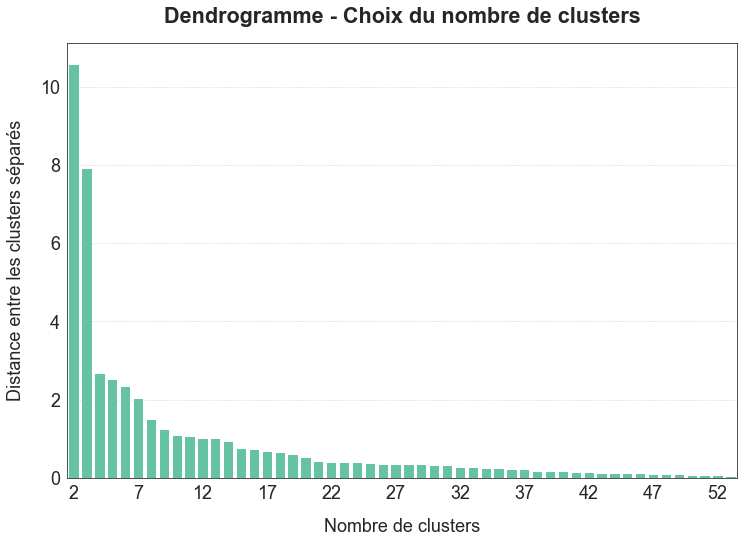

In [70]:
data_classif = choix_pays.reset_index()[["country_code","revenu_moyen","gini_from_centiles"]].copy().set_index("country_code")
classif_h = sfca.ClassificationHierarchique(data_classif)
fig, ax = classif_h.graphique_choix_nclusters()
plt.savefig("M2_dendro_choixclusters.png")
plt.show()

Je choisis de faire une partition en 7 clusters, car je remarque un décrochage dans la distance entre les clusters séparés après 7 clusters.

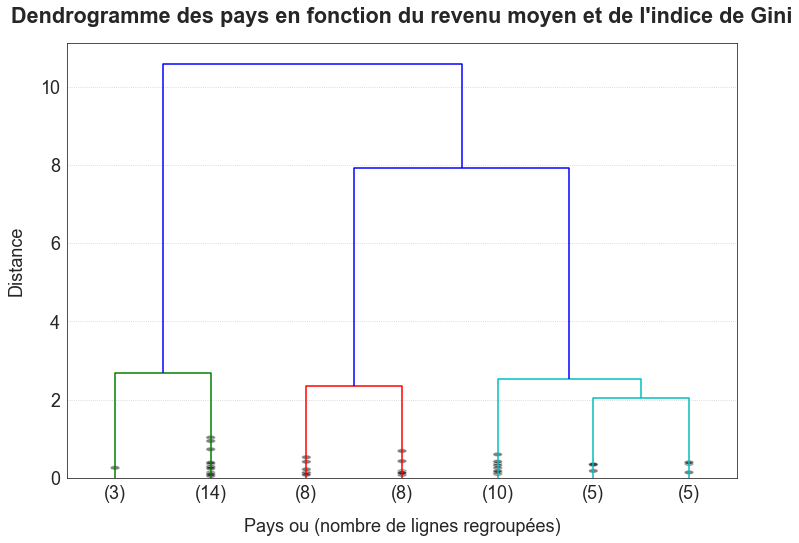

In [71]:
classif_h.define_n_clusters(7)
classif_h.calculate_clusters_centroids()
fig, ax = classif_h.graphique_dendrogramme(title="Dendrogramme des pays en fonction du revenu moyen et de l'indice de Gini", clusters_label_title="Pays", n_clusters=7)
plt.show()

In [72]:
resultats_h = classif_h.df_data_clusters.copy()
resultats_h = resultats_h.merge(income.reset_index()[["country_code","population","country"]], how='left', on="country_code")
resultats_h.head()

,country_code,revenu_moyen,gini_from_centiles,cluster,population,country
0,ARG,5847.884654,46.524916,4,40382389.0,Argentina
1,ARM,1628.382785,28.030458,5,2908220.0,Armenia
2,AUT,16637.600204,29.532585,2,8338453.0,Austria
3,BEL,15024.614176,30.157968,2,10779173.0,Belgium
4,BLR,3921.163534,28.329229,5,9507331.0,Belarus


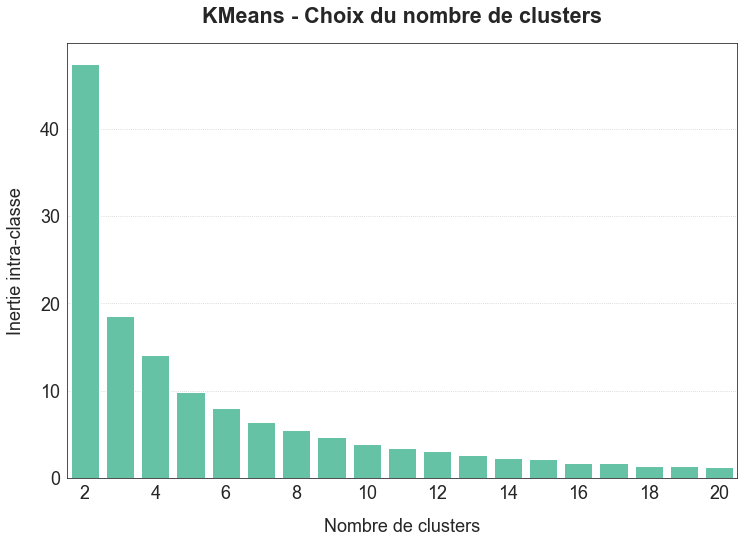

In [73]:
classif_kmeans = sfca.ClassificationKmeans(data_classif)
classif_kmeans.calculate_kmeans(n_clust_min=2, n_clust_max=20)
fig, ax = classif_kmeans.graphique_choix_nclusters()
plt.savefig("M2_kmeans_choixclusters.png")
plt.show()

Avec l'algorithme des kmeans, je choisis également 7 clusters car l'inertie intra-classe diminue plus lentement au-delà de 7 clusters.

In [74]:
classif_kmeans.define_n_clusters(7)
classif_kmeans.calculate_clusters_centroids()
resultats_kmeans = classif_kmeans.df_data_clusters.copy()
resultats_kmeans = resultats_kmeans.merge(income.reset_index()[["country_code","population","country"]], how='left', on="country_code")
resultats_kmeans.head()

,country_code,revenu_moyen,gini_from_centiles,cluster,population,country
0,ARG,5847.884654,46.524916,1,40382389.0,Argentina
1,ARM,1628.382785,28.030458,4,2908220.0,Armenia
2,AUT,16637.600204,29.532585,3,8338453.0,Austria
3,BEL,15024.614176,30.157968,3,10779173.0,Belgium
4,BLR,3921.163534,28.329229,4,9507331.0,Belarus


Je compare la classification effectuée par les deux algorithmes.

In [75]:
temp = resultats_h[["country_code","revenu_moyen","gini_from_centiles","cluster"]].merge(resultats_kmeans[["country_code","cluster","country"]], how='left', on="country_code")
temp.columns = ["country_code","revenu_moyen","gini_from_centiles","cluster_h","cluster_kmeans","country"]
print(len(temp))
temp.head()

53


,country_code,revenu_moyen,gini_from_centiles,cluster_h,cluster_kmeans,country
0,ARG,5847.884654,46.524916,4,1,Argentina
1,ARM,1628.382785,28.030458,5,4,Armenia
2,AUT,16637.600204,29.532585,2,3,Austria
3,BEL,15024.614176,30.157968,2,3,Belgium
4,BLR,3921.163534,28.329229,5,4,Belarus


In [76]:
analysis = temp.groupby("cluster_h").cluster_kmeans.nunique()
temp[temp.cluster_h.isin(analysis[analysis>1].index)].sort_values(by="cluster_h")

,country_code,revenu_moyen,gini_from_centiles,cluster_h,cluster_kmeans,country
18,FRA,18309.407545,34.563984,2,3,France
25,IRL,17710.735838,32.023737,2,3,Ireland
35,NLD,17728.641151,30.474438,2,3,Netherlands
19,GBR,21709.604470,35.582385,2,0,United Kingdom
48,SWE,16184.222707,27.216580,2,3,Sweden
17,FIN,16306.330495,29.391800,2,3,Finland
27,ITA,14925.214922,33.396861,2,3,Italy
15,ESP,13116.992910,32.417717,2,3,Spain
11,DEU,18061.718142,32.323296,2,3,Germany
9,CYP,17345.387463,29.754946,2,3,Cyprus


Seuls 2 pays, parmi les 53 analysés, ne sont pas classifiés de la même manière par les deux algorithmes : le Royaume-Uni et l'Estonie (attention, cette observation peut changer d'un calcul à l'autre du notebook, à cause de "l'instabilité" du kmeans).  
Je crée le graphique des classifications pour les comparer visuellement, dans le repère composé du revenu moyen et de l'indice de Gini, qui sont les 2 variables qui ont servi à la classification.

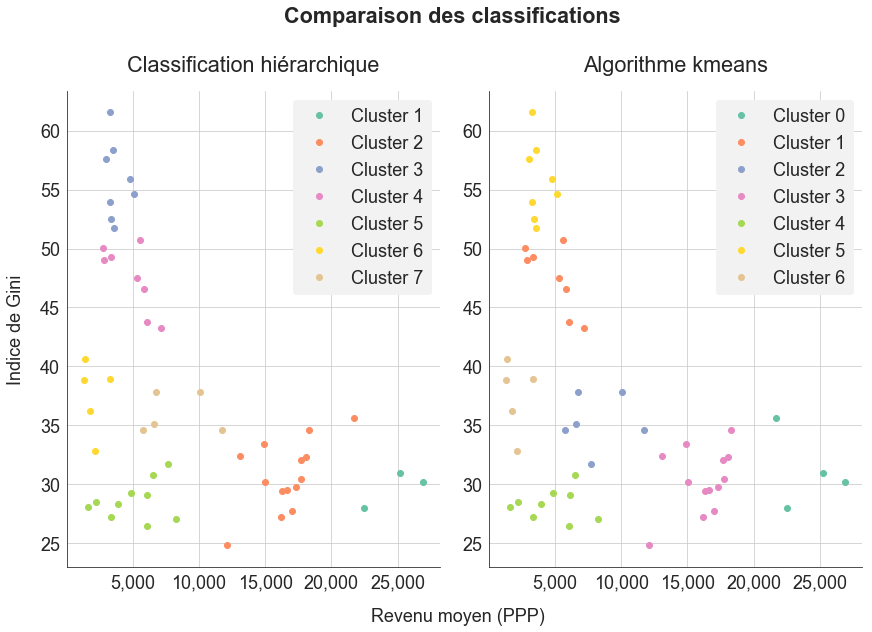

In [78]:
graph23 = sfg.MyGraph(title="Comparaison des classifications", nblin=1, nbcol=2, figsize=(12,8))
for i in np.sort(temp.cluster_h.unique()):
    graph23.add_plot(x_values=temp[temp.cluster_h==i].revenu_moyen, y_values=temp[temp.cluster_h==i].gini_from_centiles, label="Cluster {}".format(i), marker='o', linestyle='', subtitle="Classification hiérarchique", with_grid='both', legend=True, multi_index=1)
for i in np.sort(temp.cluster_kmeans.unique()):
    graph23.add_plot(x_values=temp[temp.cluster_kmeans==i].revenu_moyen, y_values=temp[temp.cluster_kmeans==i].gini_from_centiles, label="Cluster {}".format(i), marker='o', linestyle='', subtitle="Algorithme kmeans", with_grid='both', legend=True, multi_index=2)
graph23.set_axe('x', label="Revenu moyen (PPP)", label_position=(1.05, 0.5), tick_labels_format=':,.0f', multi_index=1)
graph23.set_axe('x', tick_labels_format=':,.0f', multi_index=2)
graph23.set_axe('y', label="Indice de Gini", multi_index=1)
fig, ax = graph23.fig, graph23.ax
plt.savefig("M2_dendro_kmeans_comparaison.png")
plt.show()

Les deux classifications sont très similaires. Je choisis la classification hiérarchique qui présente l'avantage d'être stable d'une exécution à l'autre.

Je commence à regarder dans quel cluster se trouve la France. Puis je choisis des pays avec une population comparable dans les autres clusters, dans la mesure du possible.  
J'essaie de trouver des pays avec une population comprise entre 20 millions et 104 millions d'habitants (écart de 42 millions centré autour de 62 millions d'habitants, la population de la France). S'il y a plusieurs pays, je choisis le pays le plus proche de la population française. S'il n'y pas de pays dans cette tranche de population, je liste les pays présents dans le cluster et leur population. Je choisirai alors le pays le plus proche en population dans ce cluster.

In [79]:
min_pop = 20000000
max_pop = 104000000
resultats_h.set_index("country_code", inplace=True)
clust_france = resultats_h.loc["FRA"].cluster
resultats_h.loc["FRA"]

revenu_moyen              18309.4
gini_from_centiles         34.564
cluster                         2
population            6.23296e+07
country                    France
Name: FRA, dtype: object

In [80]:
for clust in np.sort(resultats_h[resultats_h.cluster != clust_france].cluster.unique()):
    temp2 = resultats_h[(resultats_h.cluster==clust) & (resultats_h.population.between(min_pop,max_pop))][["cluster","population","country"]]
    if len(temp2) > 0:
        print(temp2)
    else:
        print(resultats_h[(resultats_h.cluster==clust)][["cluster","population","country"]])

              cluster  population     country
country_code                                 
ISL                 1    310884.0     Iceland
LUX                 1    485105.0  Luxembourg
NOR                 1   4771409.0      Norway
              cluster  population   country
country_code                               
COL                 3  44901544.0  Colombia
              cluster  population    country
country_code                                
ARG                 4  40382389.0  Argentina
PER                 4  28641980.0       Peru
THA                 4  65824164.0   Thailand
TUR                 4  70440032.0     Turkey
              cluster  population  country
country_code                              
UKR                 5  46186430.0  Ukraine
              cluster  population  country
country_code                              
ROU                 6  20821084.0  Romania
              cluster  population country
country_code                             
POL                 7  383

Un seul cluster ne présente pas de pays avec une population comprise entre 20 millions et 100 millions d'habitants. Dans ce cluster de pays avec peu d'habitants, je choisis la Norvège qui est le pays le plus peuplé.  
Dans 4 autres clusters, un seul pays est sélectionné : Colombie, Ukraine, Roumanie et Pologne.  
Dans un cluster, 4 pays sont sélectionnés. La Thaïlande est le pays le plus proche en termes de population.  
Je sauvegarde les country_code des pays sélectionnés en les triant par indice de Gini croissant.

In [81]:
list_pays_graph = resultats_h.loc[["FRA","NOR","COL","THA","UKR","ROU","POL"]].sort_values(by="gini_from_centiles")
list_pays_graph

,revenu_moyen,gini_from_centiles,cluster,population,country
country_code,,,,,
UKR,3349.388306,27.241550,5,46186430.0,Ukraine
NOR,22483.375020,28.014664,1,4771409.0,Norway
FRA,18309.407545,34.563984,2,62329567.0,France
POL,5741.720225,34.600084,7,38325689.0,Poland
ROU,3318.337189,38.952699,6,20821084.0,Romania
THA,2743.712641,50.076928,4,65824164.0,Thailand
COL,3547.005276,58.343686,3,44901544.0,Colombia


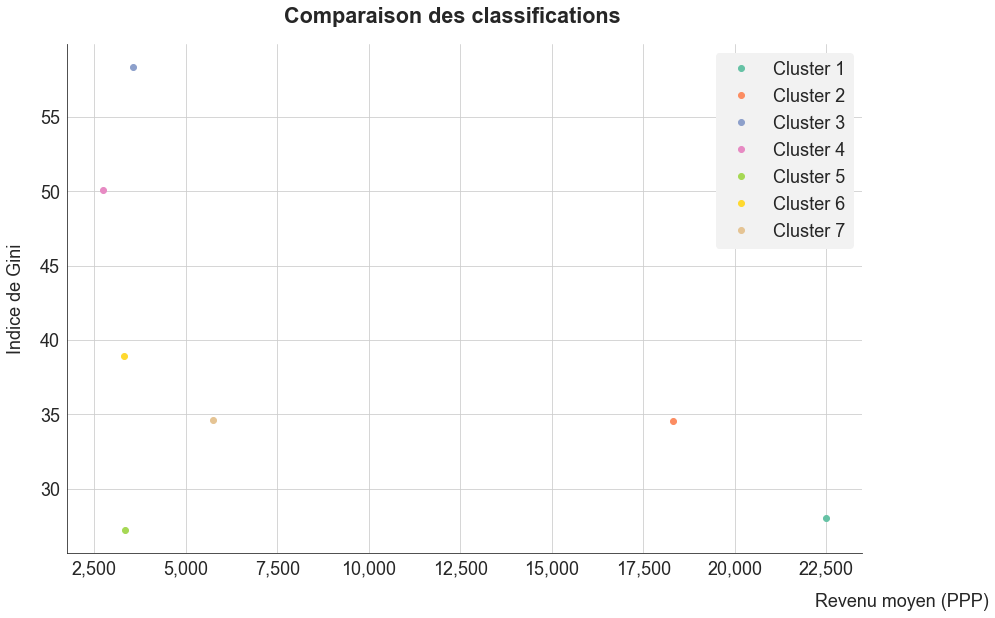

In [82]:
graph23b = sfg.MyGraph(title="Comparaison des classifications")
for i in np.sort(temp.cluster_h.unique()):
    graph23b.add_plot(x_values=temp[(temp.cluster_h==i) & (temp.country_code.isin(list_pays_graph.index.values))].revenu_moyen, y_values=temp[(temp.cluster_h==i) & (temp.country_code.isin(list_pays_graph.index.values))].gini_from_centiles, label="Cluster {}".format(i), marker='o', linestyle='', with_grid='both', legend=True)
graph23b.set_axe('x', label="Revenu moyen (PPP)", tick_labels_format=':,.0f')
graph23b.set_axe('y', label="Indice de Gini")
fig, ax = graph23b.fig, graph23b.ax
plt.savefig("M2_selection_pays.png")
plt.show()

<a id='2_2'></a>

### 2.2. Comparaison de la distribution des revenus

Je souhaite comparer la distribution des revenus entre les pays sélectionnées, qui présentent différents profils de concentration des revenus.

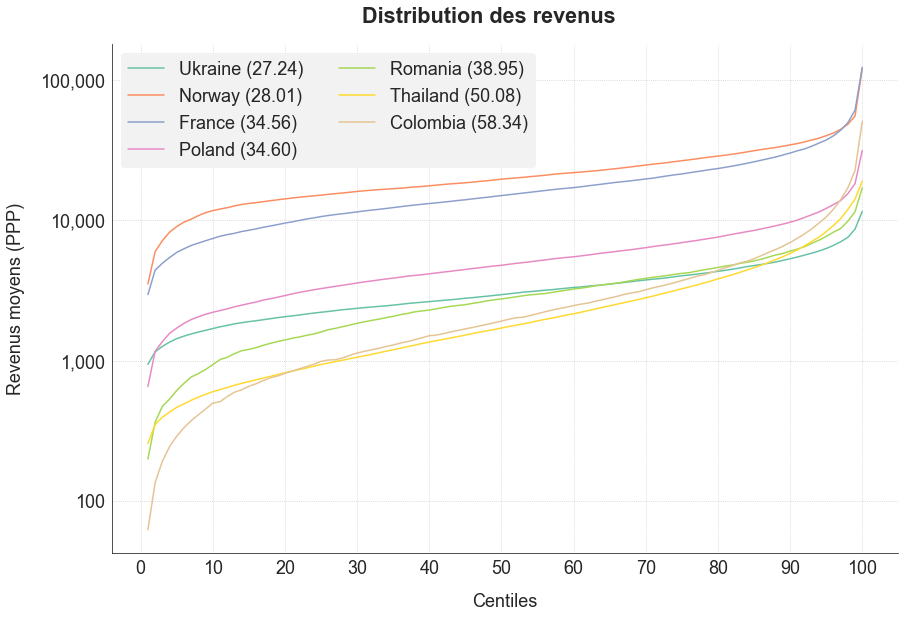

In [83]:
graph24 = sfg.MyGraph(title="Distribution des revenus")
graph24.ax[0].set_yscale('log')
#list_markers = ['o','v','^','s','*','h','x','D']
for pays in list_pays_graph.index:
    mylabel = "{} ({:.2f})".format(list_pays_graph.loc[pays].country, list_pays_graph.loc[pays].gini_from_centiles)
    graph24.add_plot(x_values=np.arange(100)+1, y_values=centiles[centiles.country_code==pays].income, \
                    label=mylabel, with_grid='both', grid_style=':', legend=True)
graph24.set_axe('x', label="Centiles", tick_min=0, tick_max=100, tick_step=10, tick_labels_format=':.0f')
graph24.set_axe('y', label="Revenus moyens (PPP)", tick_labels_format=':,.0f')
graph24.set_legend(ncol=2)
fig, ax = graph24.fig, graph24.ax
plt.savefig("M2_distribution_revenus.png")
plt.show()

Les extrémités de toutes les distributions sont très pentues : les 5% plus pauvres sont beaucoup plus pauvres que le reste de la population et les 5% plus riches beaucoup plus riches que le reste de la population. Cette différence tend à être plus marquée pour les pays dont l'indice de Gini est plus élevé, c'est-à-dire dont les revenus sont moins uniformément répartis.  
Plus l'indice de Gini est faible, donc plus les revenus sont uniformément répartis, moins la partie centrale de la distribution, entre 10% et 90% est pentue.

<a id='2_3'></a>

### 2.3. Courbes de Lorenz des pays sélectionnés

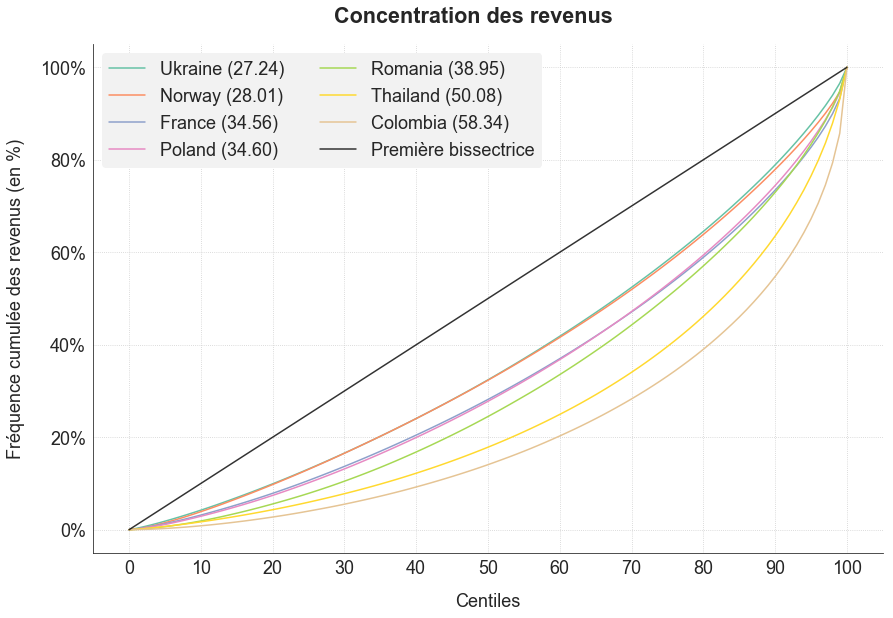

In [84]:
graph25 = sfg.MyGraph(title="Concentration des revenus")
#list_markers = ['o','v','^','s','*','h','x','D']
for pays in list_pays_graph.index:
    mylabel = "{} ({:.2f})".format(list_pays_graph.loc[pays].country, list_pays_graph.loc[pays].gini_from_centiles)
    interlorenz, intergini = sfg.calcul_lorenz_gini(centiles[centiles.country_code==pays].income.values)
    graph25.add_plot(x_values=np.arange(len(interlorenz)), y_values=interlorenz, label=mylabel)
graph25.add_plot(x_values=np.arange(101), y_values=np.linspace(0,1,101), label="Première bissectrice", \
                 color="black", alpha=0.8, with_grid='both', grid_style=':', legend=True)
graph25.set_axe('x', label="Centiles", tick_min=0, tick_max=100, tick_step=10, tick_labels_format=':.0f')
graph25.set_axe('y', label="Fréquence cumulée des revenus (en %)", tick_labels_format=':.0%')
graph25.set_legend(ncol=2)
fig, ax = graph25.fig, graph25.ax
plt.savefig("M2_concentration_revenus.png")
plt.show()

La courbe de Lorenz met bien en évidence la concentration des revenus. On voit bien qu'elle est directement liée à l'indice de Gini.  
Ainsi, les courbes de Lorenz de l'Ukraine et de la Norvège, qui ont deux indices de Gini proches, sont presque confondues. De même pour les courbes de la France et de la Pologne. 

<a id='2_4'></a>

### 2.4. Evolution de l'indice de Gini dans le temps

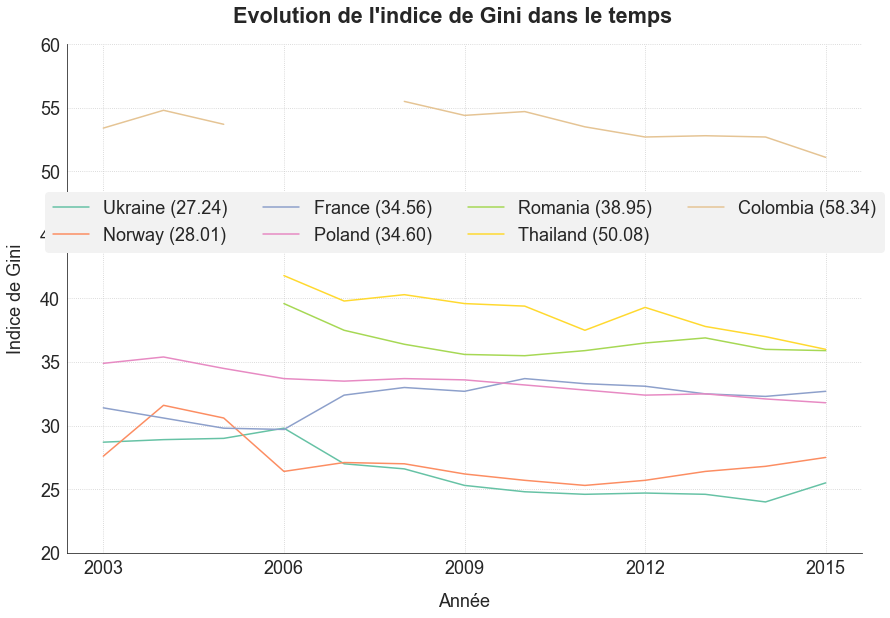

In [85]:
graph26 = sfg.MyGraph(title="Evolution de l'indice de Gini dans le temps")
for pays in list_pays_graph.index:
    mylabel = "{} ({:.2f})".format(list_pays_graph.loc[pays].country, list_pays_graph.loc[pays].gini_from_centiles)
    graph26.add_plot(x_values=gini.columns[1:], y_values=gini.loc[pays,gini.columns[1:]], label=mylabel, \
                     with_grid='both', grid_style=':')
graph26.set_axe('x', label="Année", tick_min=2003, tick_max=2015, tick_step=3, tick_labels_format=':.0f')
graph26.set_axe('y', label="Indice de Gini", tick_min=20, tick_max=60, tick_step=5, tick_labels_format=':.0f')
graph26.set_legend(ncol=4, loc="center", bbox_to_anchor=(0.5,0.65))
fig, ax = graph26.fig, graph26.ax
plt.savefig("M2_evolution_gini.png")
plt.show()

Les pays où les revenus sont les plus inégaux affichent une tendance dans le temps à la diminution de leur indice de Gini : cela marque une tendance à l'amélioration avec une répartition des revenus qui devient progressivement plus homogène. Le développement économique de ces pays bénéficie peut-être à une grande partie de la population.  
En France, on note l'effet inverse avec une tendance à une plus grande concentration des revenus. La politique sociale devient peut-être moins efficace pour redistribuer les revenus entre la population. La Pologne, dont l'indice de Gini suit la tendance inverse, est ainsi passée devant la France en termes d'homogénéité de la répartition des revenus.

<a id='2_5'></a>

### 2.5. Analyse de l'indice de Gini

J'analyse les valeurs moyennes et extrêmes de l'indice de Gini sur la base des pays que je vais utiliser pour ma modélisation, à savoir la totalité des 114 pays pour lesquels je dispose de données par centiles.

Pour commencer, je classe les pays **en fonction de l'indice de Gini calculé à partir des centiles**.

In [86]:
income.sort_values(by="gini_from_centiles").head()

,,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
country_code,year,,,,,,,
SVN,2008,12106.007475,27197.0,23.7,24.824876,2024538.0,12.0,Slovenia
SVK,2008,6096.579894,20515.0,26.0,26.457318,5398856.0,12.0,Slovakia
CZE,2008,8235.293411,23223.0,26.3,27.016228,10423794.0,12.0,Czechia
SWE,2008,16184.222707,34371.0,28.1,27.216580,9236890.0,13.0,Sweden
UKR,2008,3349.388306,6721.0,26.6,27.241550,46186430.0,13.0,Ukraine


In [87]:
income.sort_values(by="gini_from_centiles").tail()

,,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
country_code,year,,,,,,,
CAF,2008,811.299901,685.0,56.2,57.597241,4345386.0,2.0,Central African Republic
GTM,2011,2142.474753,4367.0,NaN,58.246806,14948919.0,2.0,Guatemala
COL,2008,3547.005276,8185.0,55.5,58.343686,44901544.0,11.0,Colombia
HND,2008,3296.268419,3628.0,55.5,61.551164,7872658.0,13.0,Honduras
ZAF,2008,5617.904880,9602.0,63.0,68.294901,50412129.0,4.0,South Africa


In [88]:
income.gini_from_centiles.mean()

39.57846258221954

In [89]:
income.gini_from_centiles.describe()

count    114.000000
mean      39.578463
std        8.944331
min       24.824876
25%       32.516756
50%       37.803072
75%       45.443227
max       68.294901
Name: gini_from_centiles, dtype: float64

In [90]:
temp = income.sort_values(by="gini_from_centiles").reset_index()
print("Nombre de pays = {}".format(len(temp)))
temp[temp.country_code=="FRA"]

Nombre de pays = 114


,country_code,year,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
38,FRA,2008,18309.407545,30357.0,33.0,34.563984,62329567.0,13.0,France


In [91]:
income.loc["FRA"].gini_from_centiles.values

array([34.56398404])

La France se situe au 39ème rang des 114 pays analysés, sur la base de l'indice de Gini calculé à partir des centiles des revenus.  
Les indices de Gini se répartissent entre 24.82 et 68.29, avec une moyenne de 39.58.

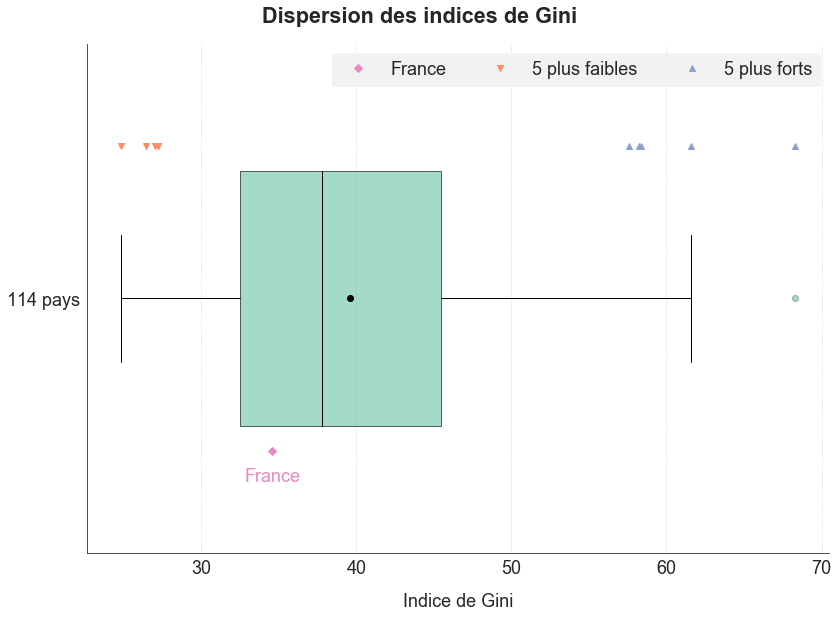

In [92]:
graph27 = sfg.MyGraph(title="Dispersion des indices de Gini")
graph27.add_plot(x_values=income.loc["FRA"].gini_from_centiles.values, y_values=0.7, label="France", linestyle="", marker="D", color=graph27.liste_couleurs[3])
graph27.add_plot(x_values=income.sort_values(by="gini_from_centiles").head().gini_from_centiles, y_values=[1.3,1.3,1.3,1.3,1.3], label="5 plus faibles", linestyle="", marker="v", markerfacecolor=graph27.liste_couleurs[1], markeredgecolor=graph27.liste_couleurs[1])
graph27.add_plot(x_values=income.sort_values(by="gini_from_centiles").tail().gini_from_centiles, y_values=[1.3,1.3,1.3,1.3,1.3], label="5 plus forts", linestyle="", marker="^", markerfacecolor=graph27.liste_couleurs[2], markeredgecolor=graph27.liste_couleurs[2], legend=True)
graph27.add_boxplot(values=income.gini_from_centiles, cat_labels=["114 pays"], means=True, vertical=False, width=0.5, alpha=0.6)
graph27.add_texts_boxplot(["France"], [income.loc["FRA"].gini_from_centiles.values], [0.65], color=graph27.liste_couleurs[3])
graph27.set_axe('x', label="Indice de Gini")
graph27.set_legend(ncol=3)
fig, ax = graph27.fig, graph27.ax
plt.savefig("M2_dispersion_gini.png")
plt.show()

<a id='2_6'></a>

### 2.6. Pour aller plus loin

Je fais les mêmes opérations en me basant sur **l'indice de Gini estimé par la Banque Mondiale**, afin de voir si j'ai des différences significatives dans les résultats obtenus.

In [93]:
income[~income.gini.isna()].sort_values(by="gini").head()

,,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
country_code,year,,,,,,,
SVN,2008,12106.007475,27197.0,23.7,24.824876,2024538.0,12.0,Slovenia
DNK,2008,17043.146491,34130.0,25.2,27.710015,5497795.0,13.0,Denmark
SVK,2008,6096.579894,20515.0,26.0,26.457318,5398856.0,12.0,Slovakia
CZE,2008,8235.293411,23223.0,26.3,27.016228,10423794.0,12.0,Czechia
UKR,2008,3349.388306,6721.0,26.6,27.241550,46186430.0,13.0,Ukraine


Je retrouve quatre pays identiques : Slovénie, Slovaquie, Tchéquie et Ukraine. Le Danemark remplace la Suède.

In [94]:
income[~income.gini.isna()].sort_values(by="gini").tail()

,,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
country_code,year,,,,,,,
BRA,2008,4807.484594,9559.0,54.0,55.890464,192979029.0,12.0,Brazil
HND,2008,3296.268419,3628.0,55.5,61.551164,7872658.0,13.0,Honduras
COL,2008,3547.005276,8185.0,55.5,58.343686,44901544.0,11.0,Colombia
CAF,2008,811.299901,685.0,56.2,57.597241,4345386.0,2.0,Central African Republic
ZAF,2008,5617.904880,9602.0,63.0,68.294901,50412129.0,4.0,South Africa


Je retrouve également 4 pays identiques : Colombie, Honduras, République Centrale Africaine et Afrique du Sud. Le Brésil remplace le Guatemala.

In [95]:
income[~income.gini.isna()].gini.mean()

37.598888888888894

In [96]:
income[~income.gini.isna()].gini.describe()

count    90.000000
mean     37.598889
std       8.511809
min      23.700000
25%      31.550000
50%      35.700000
75%      43.725000
max      63.000000
Name: gini, dtype: float64

In [97]:
temp = income[~income.gini.isna()].sort_values(by="gini").reset_index()
print("Nombre de pays = {}".format(len(temp)))
temp[temp.country_code=="FRA"]

Nombre de pays = 90


,country_code,year,revenu_moyen,pib_par_habitant,gini,gini_from_centiles,population,nb_annees_gini,country
32,FRA,2008,18309.407545,30357.0,33.0,34.563984,62329567.0,13.0,France


La France se situe au 33ème rang des 90 pays analysés en terme d'indice de Gini estimé par la Banque Mondiale.

**Comparaison des courbes de Lorenz estimées à partir des centiles et des déciles, pour la France**

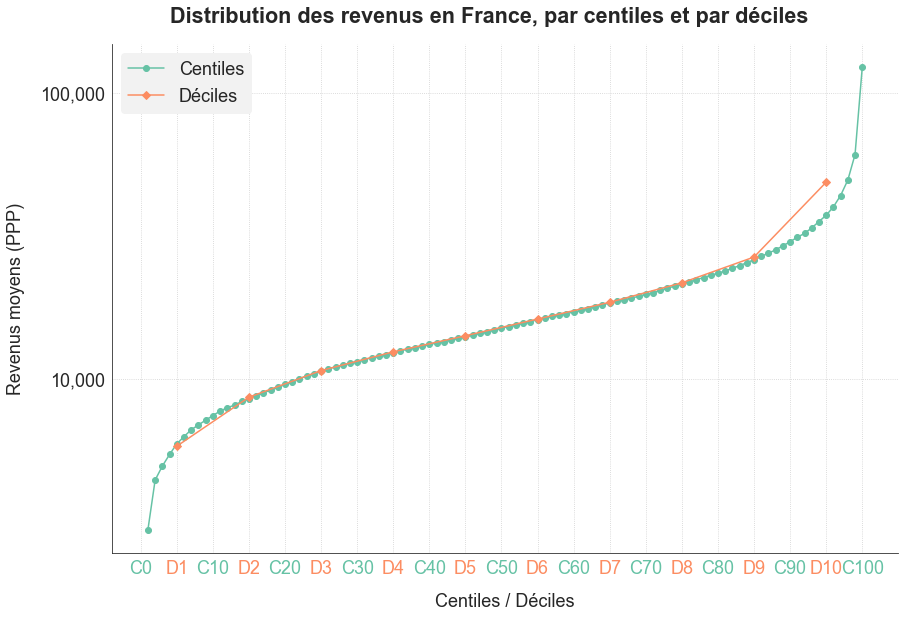

In [98]:
graph28 = sfg.MyGraph(title="Distribution des revenus en France, par centiles et par déciles")
graph28.ax[0].set_yscale('log')
graph28.add_plot(x_values=np.arange(100)+1, y_values=centiles[centiles.country_code=="FRA"].income, \
                    label="Centiles", marker="o")
graph28.add_plot(x_values=np.arange(10)*10+5, y_values=deciles[deciles.country_code=="FRA"].income, \
                    label="Déciles", marker="D",with_grid='both', grid_style=':', legend=True)
labels, cpt = [], 0
for i in np.arange(0,101,5):
    cpt += 1
    if cpt % 2 == 0:
        labels.append("D{}".format(cpt//2))
    else:
        labels.append("C{}".format(i))
graph28.set_axe('x', label="Centiles / Déciles", tick_min=0, tick_max=100, tick_step=5, \
               tick_labels=labels)
graph28.set_axe('y', label="Revenus moyens (PPP)", tick_labels_format=':,.0f')
for i in np.arange(len(labels)):
    graph28.ax[0].get_xticklabels()[i].set_color(graph28.liste_couleurs[i%2])
fig, ax = graph28.fig, graph28.ax
plt.show()

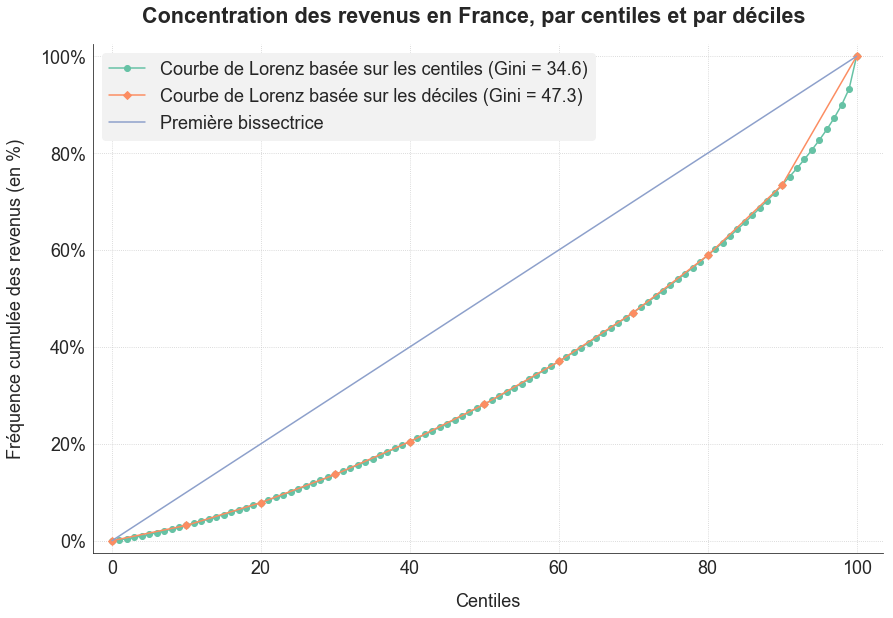

In [99]:
graph29 = sfg.MyGraph(title="Concentration des revenus en France, par centiles et par déciles")
interlorenz, intergini = sfg.calcul_lorenz_gini(centiles[centiles.country_code=="FRA"].income.values)
graph29.add_plot(x_values=np.arange(len(interlorenz)), y_values=interlorenz, \
                    label="Courbe de Lorenz basée sur les centiles (Gini = {:.1f})".format(intergini*100), marker="o",with_grid='both', grid_style=':', legend=True)
interlorenz, intergini = sfg.calcul_lorenz_gini(deciles[deciles.country_code=="FRA"].income.values)
graph29.add_plot(x_values=np.arange(0,len(interlorenz)*10,10), y_values=interlorenz, \
                    label="Courbe de Lorenz basée sur les déciles (Gini = {:.1f})".format(intergini*100), marker="D",with_grid='both', grid_style=':', legend=True)
graph29.add_plot(x_values=np.arange(101), y_values=np.linspace(0,1,101), \
                    label="Première bissectrice".format(intergini), with_grid='both', grid_style=':', legend=True)
graph29.set_axe(axe='x', label="Centiles", tick_min=-0.025*101, tick_max=1.025*101)
graph29.set_axe(axe='y', label="Fréquence cumulée des revenus (en %)", tick_min=-0.025, tick_max=1.025, tick_labels_format=':.0%')
fig, ax = graph29.fig, graph29.ax
plt.show()

<a id='3_0'></a>